# Car Price Prediction 🚗

## Problem Statement

## Data Dictionary

| #  | Variable          | Description                                     | Data Type |
|----|-------------------|-------------------------------------------------|-----------|
| 1  | Make              | Name of the manufacturer company                | string    |
| 2  | Model             | Name of the vehicle model                       | string    |
| 3  | Year              | The year that the vehicle manufactured          | integer   |
| 4  | Engine Fuel Type  | Fuel type that vehicle runs on                  | string    |
| 5  | Engine HP         | Horsepower of the vehicle                       | integer   |
| 6  | Engine Cylinders  | Nr. of cylinders that the vehicle engine has    | integer   |
| 7  | Transmission Type | Type of the transmission                        | string    |
| 8  | Driven_Wheels     | Drive train                                     | string    |
| 9  | Number of Doors   | Number of doors                                 | integer   |
| 10 | Market Category   | Market category                                 | string    |
| 11 | Vehicle Size      | Size category of the vehicle                    | string    |
| 12 | Vehicle Style     | Style of the vehicle                            | string    |
| 13 | highway MPG       | Fuel consumption on highway in miles per gallon | integer   |
| 14 | city mpg          | Fuel consumption in city in mile per gallon     | integer   |
| 15 | Popularity        | Popularity score of the vehicle                 | integer   |
| 16 | MSRP              | Price of the vehicle in $                       | integer   |



In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.float_format', lambda x:'%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
sb.set_palette('Paired')
plt.rcParams['axes.spines.top'] = False    # Remove top border
plt.rcParams['axes.spines.right'] = False  # Remove right border

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load Data

In [17]:
#data = pd.read_csv('/kaggle/input/car-features-and-prices-dataset/data.csv')
data = pd.read_csv('../Data/Raw/data.csv')
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 11914 rows and 16 columns


In [18]:
df = data.copy()

# Data Overview

In [19]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.000,6.000,MANUAL,rear wheel drive,2.000,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.000,6.000,MANUAL,rear wheel drive,2.000,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.000,6.000,MANUAL,rear wheel drive,2.000,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.000,6.000,MANUAL,rear wheel drive,2.000,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.000,6.000,MANUAL,rear wheel drive,2.000,Luxury,Compact,Convertible,28,18,3916,34500


In [20]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.000,6.000,AUTOMATIC,all wheel drive,4.000,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.000,6.000,AUTOMATIC,all wheel drive,4.000,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.000,6.000,AUTOMATIC,all wheel drive,4.000,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.000,6.000,AUTOMATIC,all wheel drive,4.000,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.000,6.000,AUTOMATIC,front wheel drive,4.000,Luxury,Midsize,Sedan,26,17,61,28995


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

🔎 **Observations:**

## Check for Missing Values

In [22]:
def check_missing_values(data):
  '''
    Prints the number of features with missing values and it's percentage
    in the dataset.
    Displayes a heatmap plot for the missing values.
    ---
    ###Parameters
    data <dataframe>: tabular data in data frame format.
  '''
  count = data.isnull().sum()[data.isnull().sum() > 0]
  percentage = (count / data.shape[0]) * 100

  print(count.shape[0], 'columns has missing values')
  print('-'*50)
  print(pd.DataFrame({'Count':count, 'Percentage %':percentage}))

  plt.figure(figsize=(10, 6))
  sb.heatmap(data.isnull(), yticklabels=False, cmap='cividis', cbar=False)
  plt.show(block=False)

5 columns has missing values
--------------------------------------------------
                  Count  Percentage %
Engine Fuel Type      3         0.025
Engine HP            69         0.579
Engine Cylinders     30         0.252
Number of Doors       6         0.050
Market Category    3742        31.408


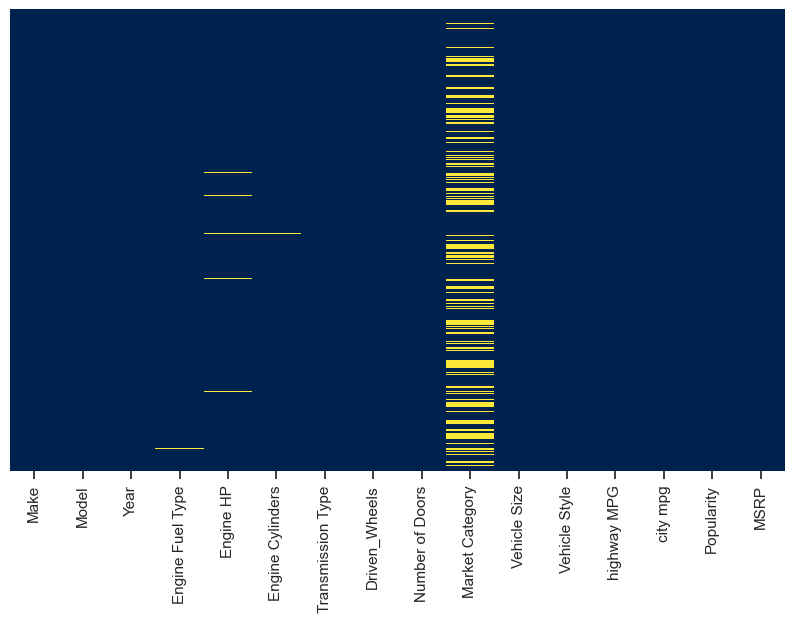

In [23]:
check_missing_values(df)

🔎 **Observations:** Five columns have missing values. Market Category has the most number of missing values. 31% of it are missing. We'll try to fill these values by using the similar Make, Model and Year information.

## Check for Duplicates

In [24]:
df.duplicated().sum()

715

🔎 **Observations:** The dataset has 715 duplicate records which should be removed in the data preparation section.

## Summary Statistics

In [25]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,11914,48,Chevrolet,1123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,11914,915,Silverado 1500,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,11914.000,NaN,NaN,NaN,2010.384,7.580,1990.000,2007.000,2015.000,2016.000,2017.000
Engine Fuel Type,11911,10,regular unleaded,7172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine HP,11845.000,NaN,NaN,NaN,249.386,109.192,55.000,170.000,227.000,300.000,1001.000
Engine Cylinders,11884.000,NaN,NaN,NaN,5.629,1.781,0.000,4.000,6.000,6.000,16.000
Transmission Type,11914,5,AUTOMATIC,8266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driven_Wheels,11914,4,front wheel drive,4787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Doors,11908.000,NaN,NaN,NaN,3.436,0.881,2.000,2.000,4.000,4.000,4.000
Market Category,8172,71,Crossover,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🔎 **Observations:**

# Exploratory Data Analysis (EDA) and Visualization

## Univariate Analysis

In [26]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)
        
print(f'Categorical features: {len(cat_cols)}', cat_cols)
print(f'Numeric features: {len(num_cols)}', num_cols)

Categorical features: 8 ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']
Numeric features: 8 ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


### Categorical Features

In [27]:
# Function to create labeled barplots for categorical features
def plot_counts(data, feature, perc = False, n = None, hue = None):
  """
    This function takes the name of the feature and plots the distribution
    of the categorical values and saves the figure for future usage using
    countplot function of seaborn.

    ---
    ### Parameters:
    - data <dataframe>: tabular data in data frame format.
    - feature <string>: Name of categorical column in dataframe to be visualized.
    - perc <bool>: whether to display percentages instead of count (default is False)
    - n <int>: displays the top n category levels (default is None, i.e., display all levels)
  """

  total = len(data[feature])            # How many number of rows are there in the feature?
  num_unique = data[feature].nunique()  # How many unique number of category are there in the feature?

  # Set the size of the figure according to the number of categories to be displayed
  if n is None:
    plt.figure(figsize = (num_unique+1, 5))
  else:
    plt.figure(figsize = (n+1, 5))

  # Set the style of the ticks on x axis
  plt.xticks(rotation=90, fontsize=12)

  # Plot the counts for each category
  ax = sb.countplot(
      data=data,
      x = feature,
      palette = 'Paired',
      order = data[feature].value_counts().index[:n].sort_values(),
      hue = hue
  )

  # Display the percentage of each category on top of the bar
  for p in ax.patches:
    if perc == True:
      label = '{:.1f}%'.format(
          100 * p.get_height() / total  # Display percentage of each class of the category
      )
    else:
      label = p.get_height() # Display count of each level of the category

    x = p.get_x() + p.get_width() / 2 # Width of the plot
    y = p.get_height() # Height of the plot

    rotation = 0
    if hue is not None:
      rotation = 30  # Rotate annotations by 30 degrees if hue is not None


    ax.annotate(
        label,
        (x, y),
        ha = 'center',
        va = 'center',
        size = 12,
        xytext = (0, 5),
        textcoords = 'offset points',
        rotation = rotation
    )
  plt.show()

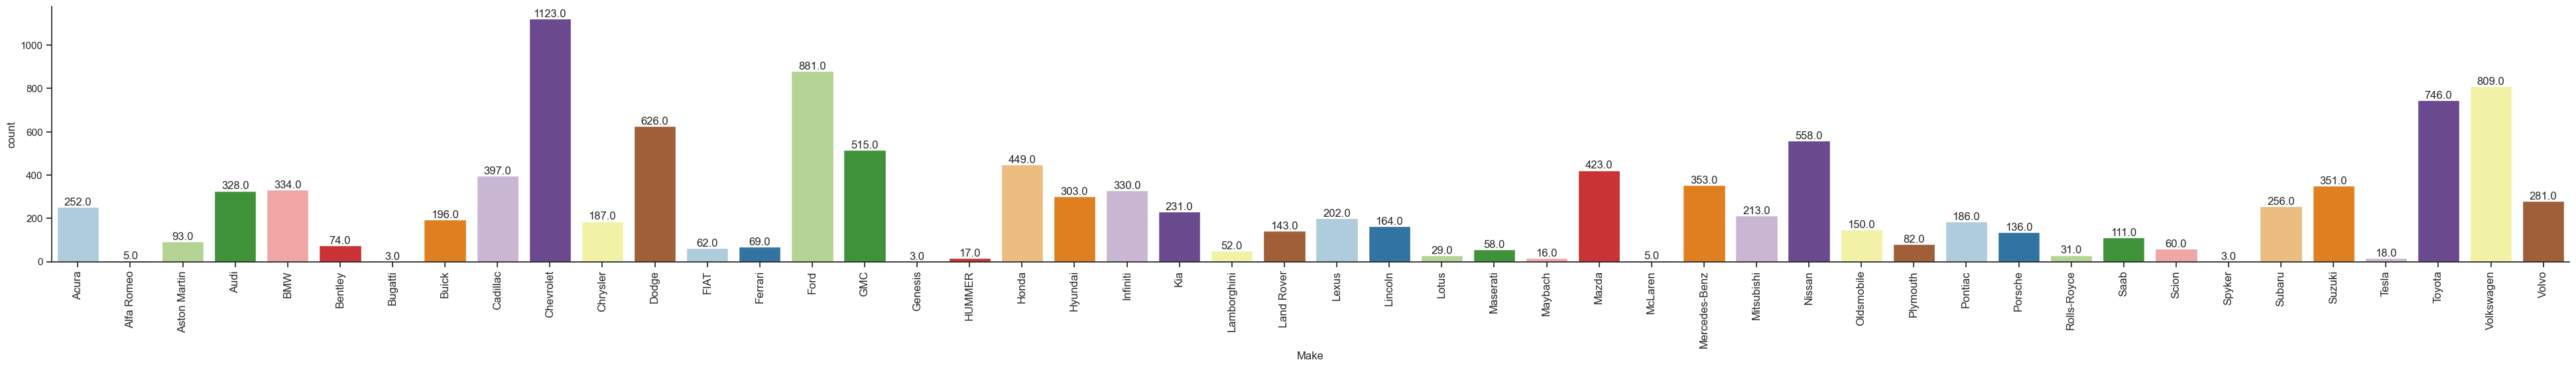

In [28]:
plot_counts(df, 'Make')

🔎 **Observations:** We know that there are 48 different makes in the dataset. Some of them are rare. That's why we'll limit the dataset for the makes which have more than 250 records. Which we think it will increase the generalization ability of the model.

In [29]:
plot_counts(df, 'Model')

ValueError: Image size of 91600x500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 91600x500 with 1 Axes>

🔎 **Observations:** Could not handle this much of category. Let's plot the top 20 model

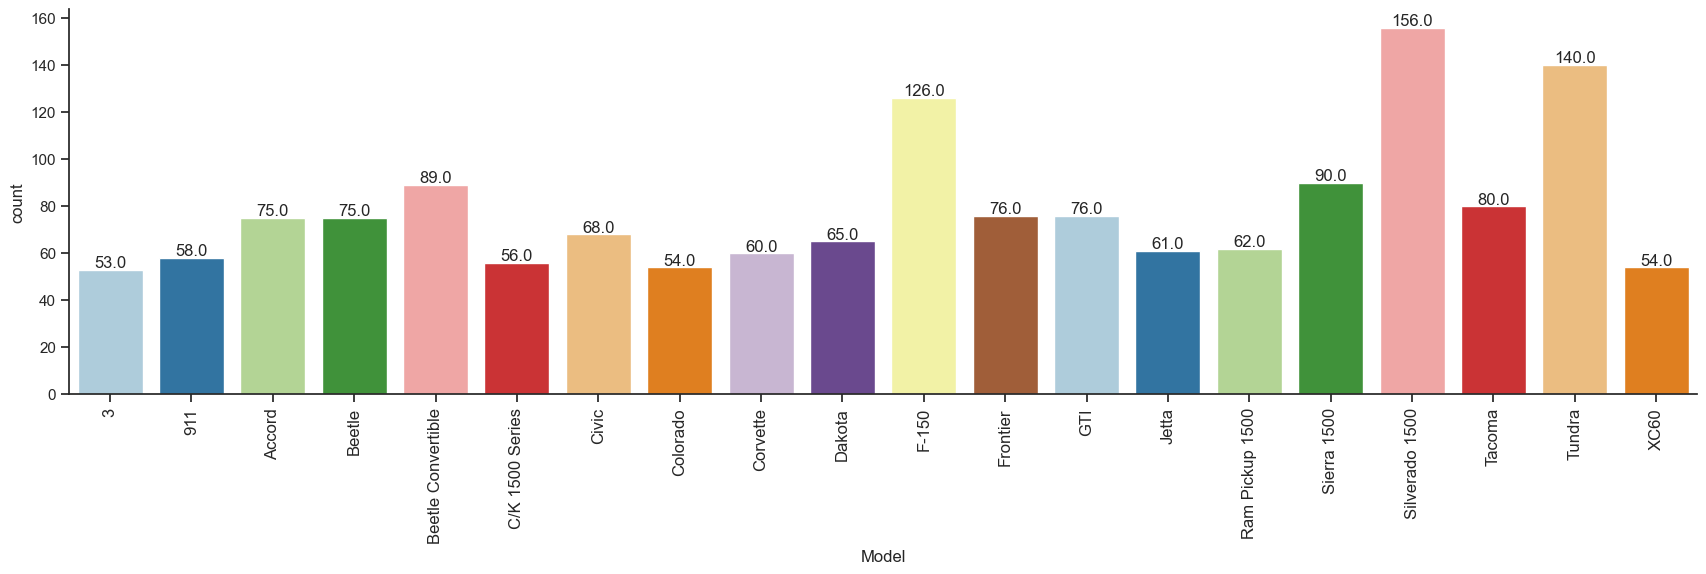

In [30]:
plot_counts(df, 'Model', n=20)

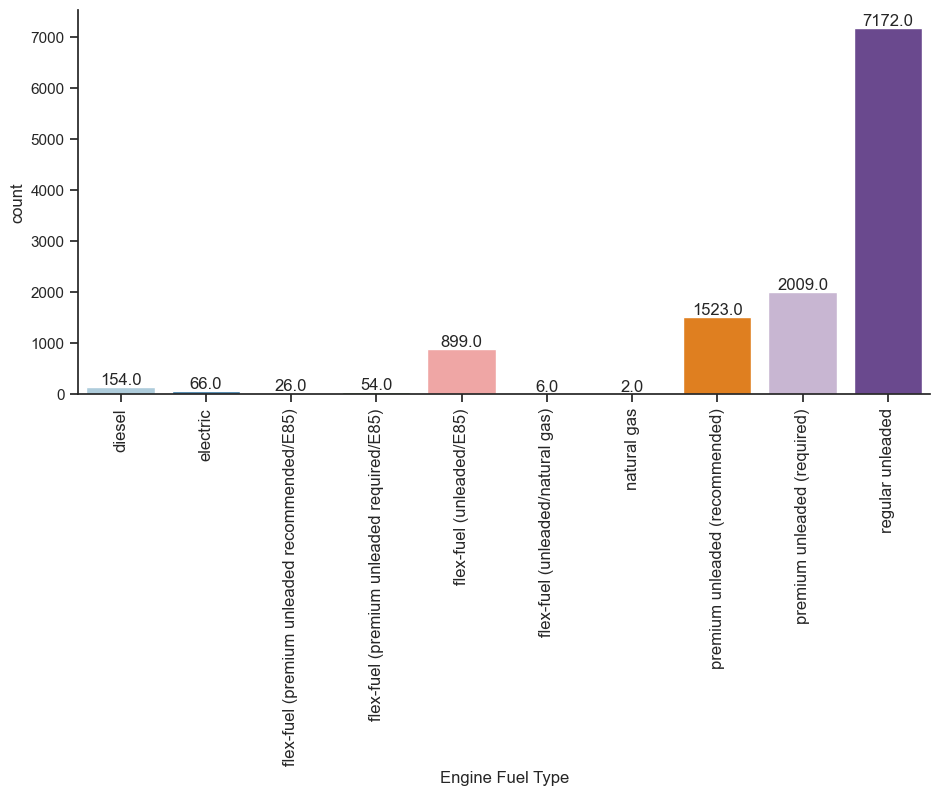

In [31]:
plot_counts(df, 'Engine Fuel Type')

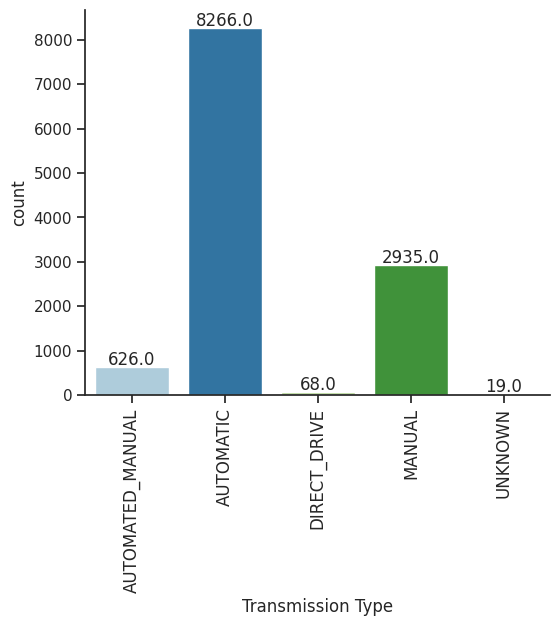

In [ ]:
plot_counts(df, 'Transmission Type')

🔎 **Observations:** The transmission type has a certain level impact on the price of a vehicle. That's why we should treat the UNKONWN transmission type as we treat missing values.

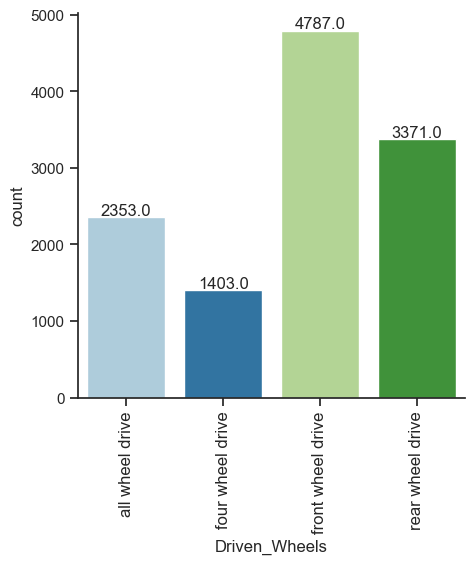

In [32]:
plot_counts(df, 'Driven_Wheels')

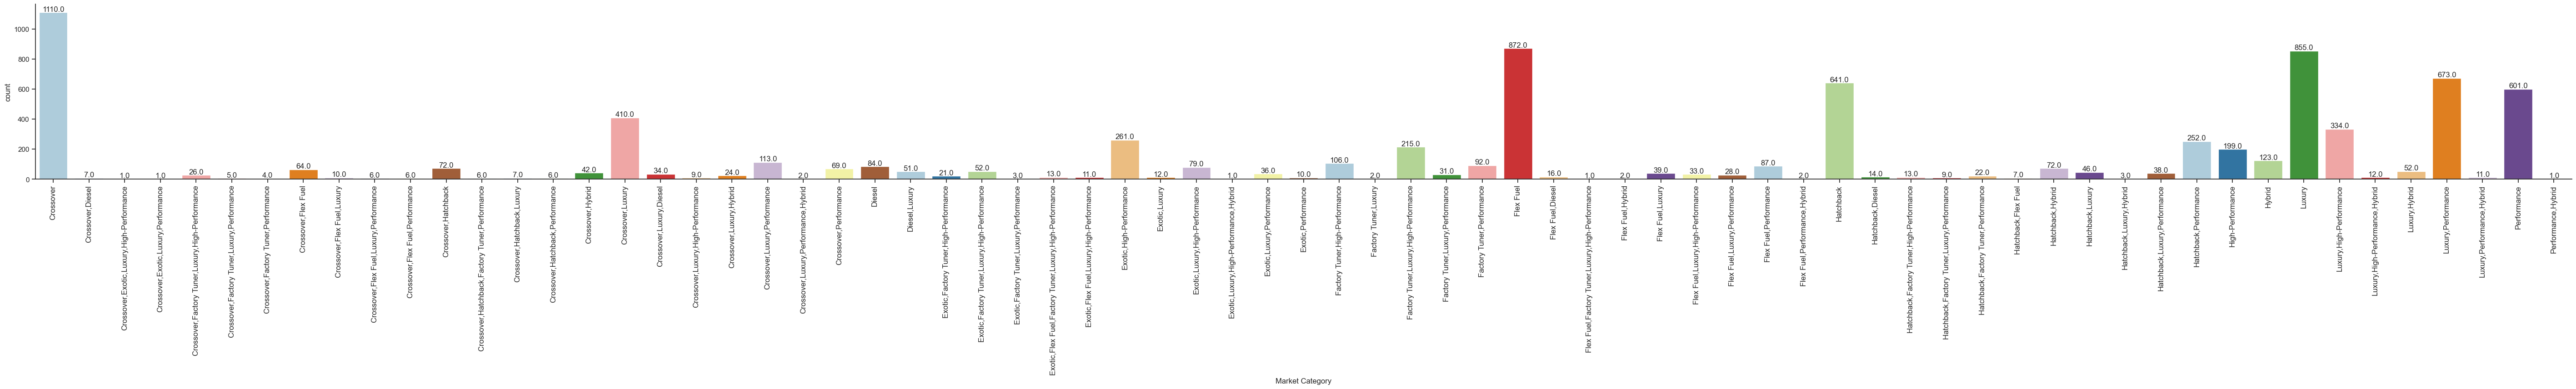

In [33]:
plot_counts(df, 'Market Category')

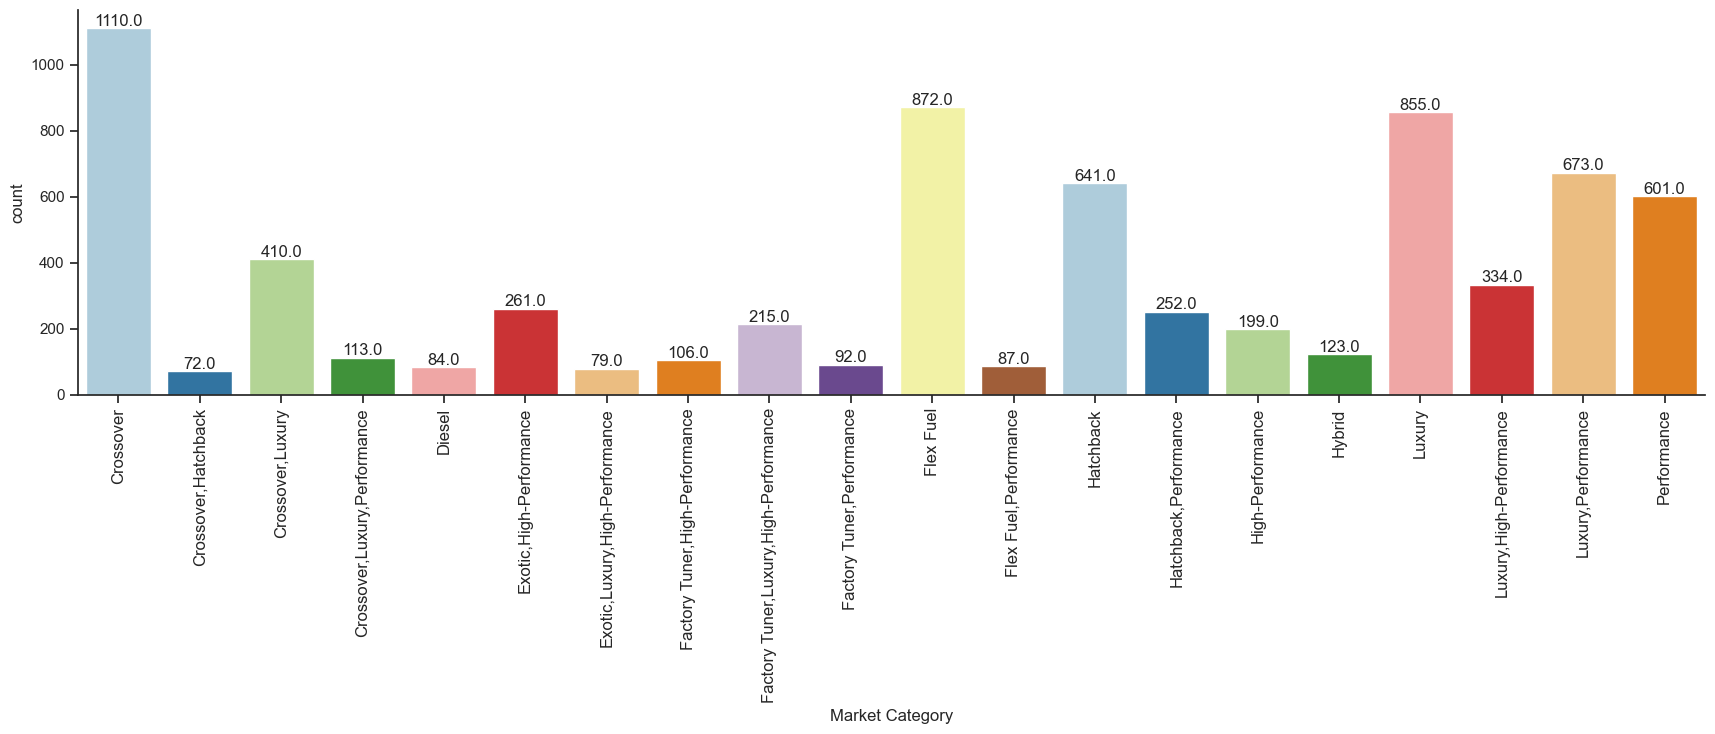

In [34]:
plot_counts(df, 'Market Category', n=20)

🔎 **Observations:** The dataset has 84 records which are belong to Diesel Market Category. On the other hand, Engine Fuel Type shows that there are 154 diesel engines in the dataset. This should be fixed.

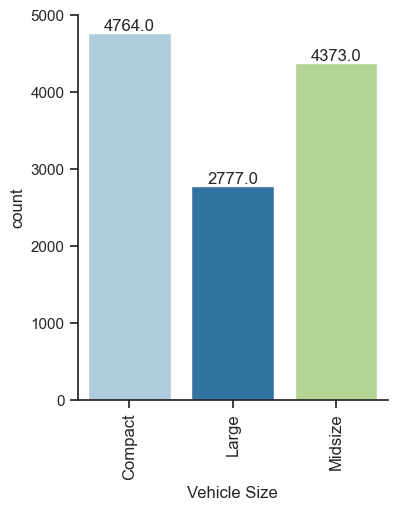

In [35]:
plot_counts(df, 'Vehicle Size')

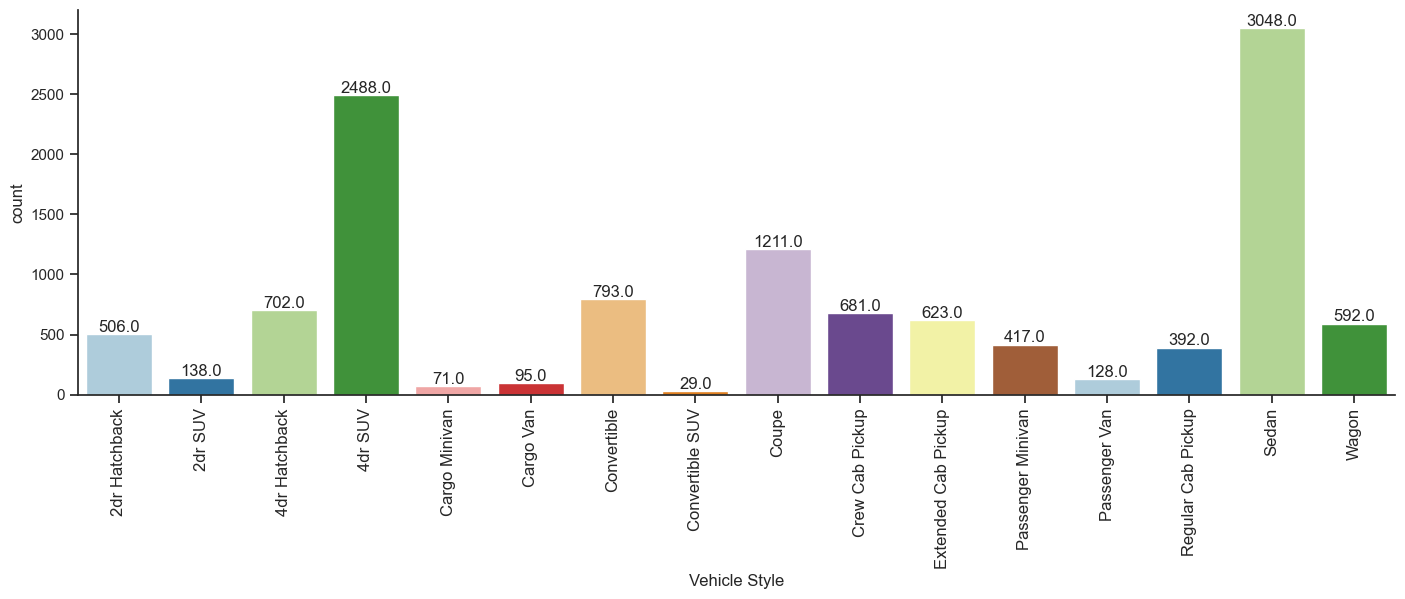

In [36]:
plot_counts(df, 'Vehicle Style')

🔎 **Observations:** Vehicle Style feature might be correlated with the Number of Doors feature. It's better to check for multi-colinearity. We want to cross check this feature with the Vehicle Size.

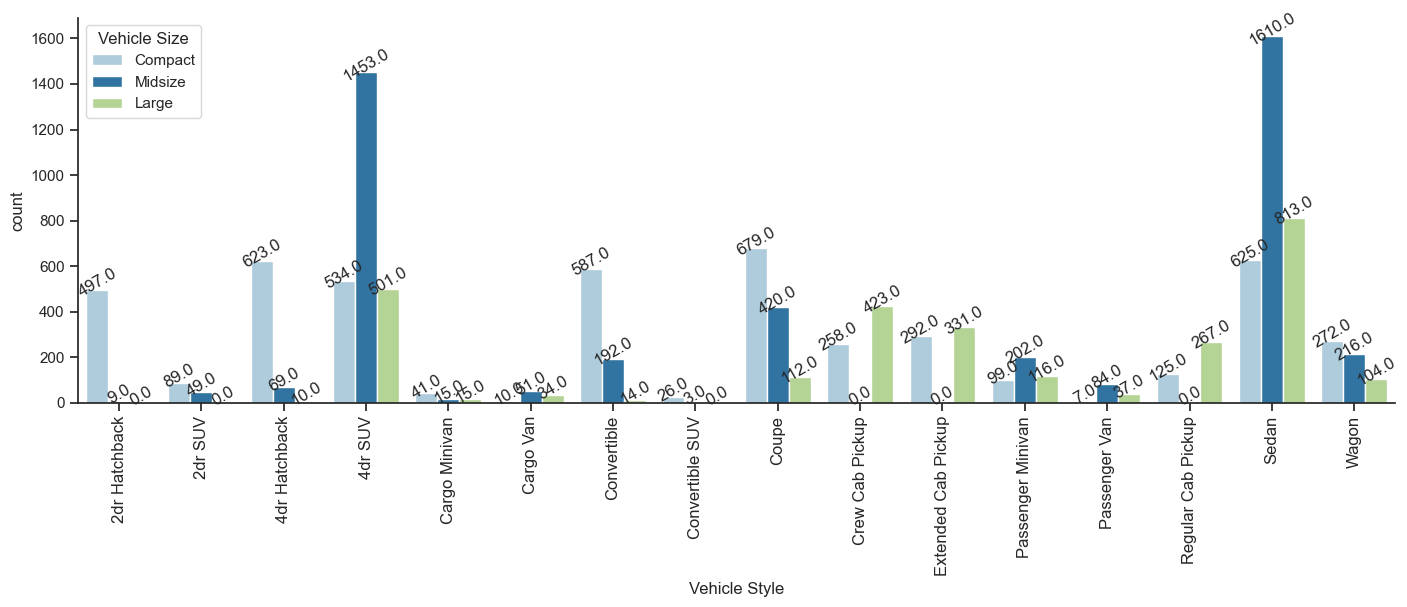

In [37]:
plot_counts(df, 'Vehicle Style', hue='Vehicle Size')

🔎 **Observations:** The dataset has Large size Coupes and Compact size Wagons which looks contradicting. It looks like a data entyr issue. This might require further investivation.

#### Overall Observations on Categorical Features:

By just looking at the below mentioned issues, I'm not sure about the consistency of the categorical features of the data.

- Contradicting enteries in Vehicle Style and Vehicle Size.
- Inconsisting Engine Fuel Type and Market Category enteries.
- A lot of missing values in Market Category.
- Potential multi-colinearity between Market Category and Number of Doors


### Numerical Features

In [38]:
num_cols

['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [39]:
# A function to display the both the histogram and the boxplot of a numeric column
def dist_plot(data, feature):
  '''
        This function takes the name of the feature and
        plots the distribution of the numeric values
        both using boxplot and hisplot of seaborn.
        The purpose is to check if the numeric feature has
        normal distribution and detect outliers manualy.
        Skewness and kurtosis values of the data are also
        shown.

        ---
        ### Parameters
        - data <dataframe>: tabular data in data frame format.
        - feature <string>: Name of numeric column in dataframe to be visualized.
  '''

  # Create the canvas with 2 sub-plots in rows with 0.15 to 0.85 ratio
  fig, (ax_box, ax_hist) = plt.subplots(
      nrows = 2,
      sharex = True,
      gridspec_kw = {'height_ratios':(0.15, 0.84)},
      figsize = (12, 6)
  )

  # Add the boxblot to the canvas in the first row
  sb.boxplot(
      data = data,
      x = feature,
      color = 'lightblue',
      showmeans = True,
      ax = ax_box
  )
  ax_box.set_xlabel('') # Remove the label from the x axis of the boxplot

  sb.histplot(
      data = data,
      x = feature,
      kde = True,
      ax = ax_hist
  )
  ax_hist.set_xlabel('') # Remove the label from the x axis of the histogram

  # Calculate the skewness and kurtosis
  skewness = data[feature].skew()
  kurt = data[feature].kurt()
  # Add skewness and kurtosis as text on the histogram plot
  ax_hist.text(
      0.95, 0.85,
      f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}',
      transform = ax_hist.transAxes,
      verticalalignment = 'top',
      horizontalalignment = 'right',
      bbox = dict(facecolor='white', edgecolor='gray', boxstyle='round, pad=0.5')
  )

  # Calculcate mean and median values of the feature
  mean_value = data[feature].mean()
  median_value = data[feature].median()

  # Add these values as a vertical line to the histogram
  ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
  ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')

  # Add legends
  ax_hist.legend(loc='lower right')

  plt.suptitle(feature)
  plt.tight_layout()
  plt.ticklabel_format(style='plain', axis='x')
  plt.show()

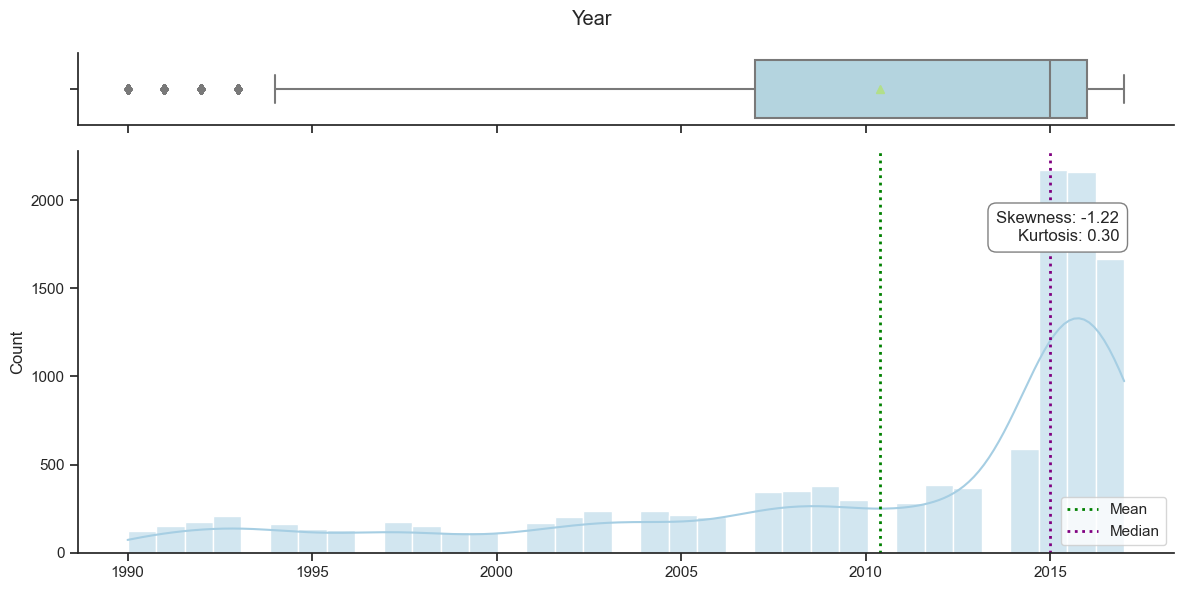

In [40]:
dist_plot(df, 'Year')

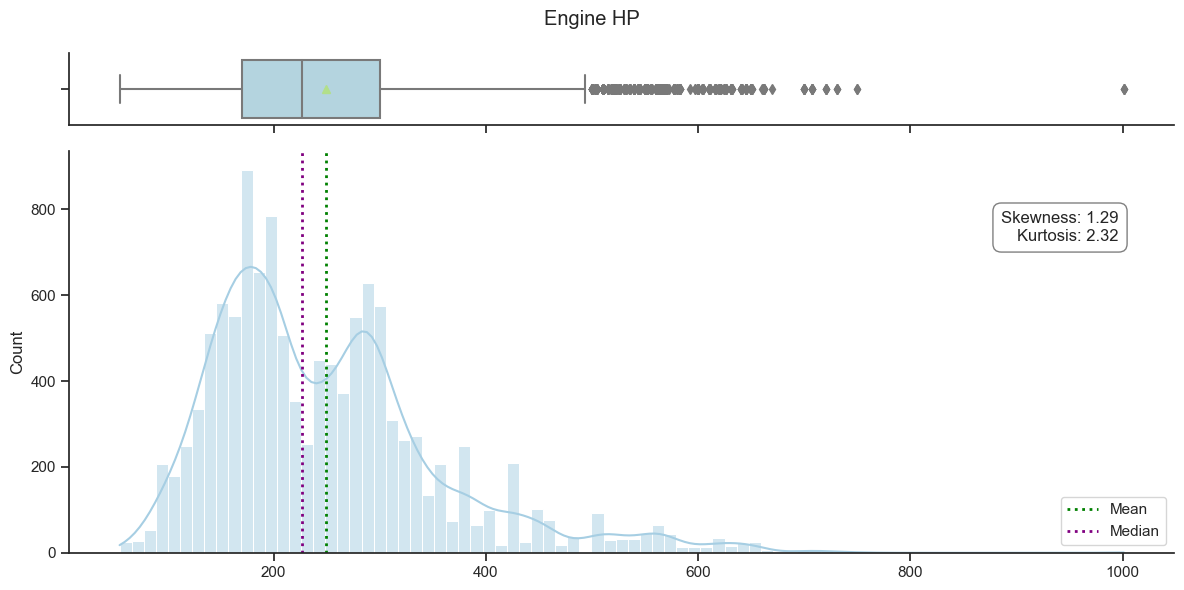

In [41]:
dist_plot(df, 'Engine HP')

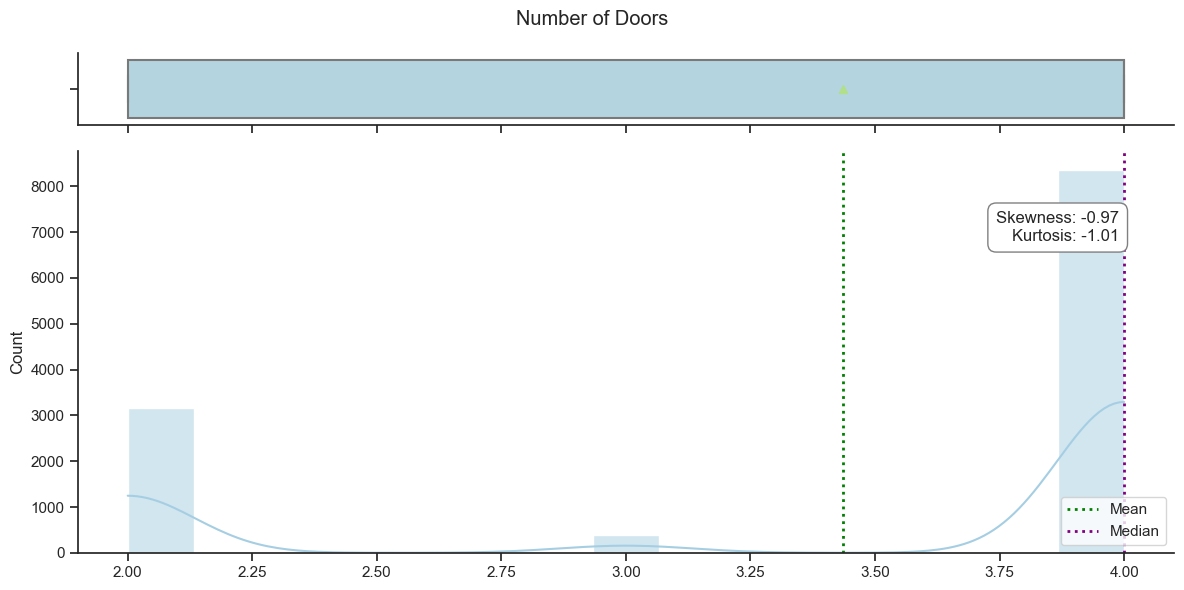

In [42]:
dist_plot(df, 'Number of Doors')

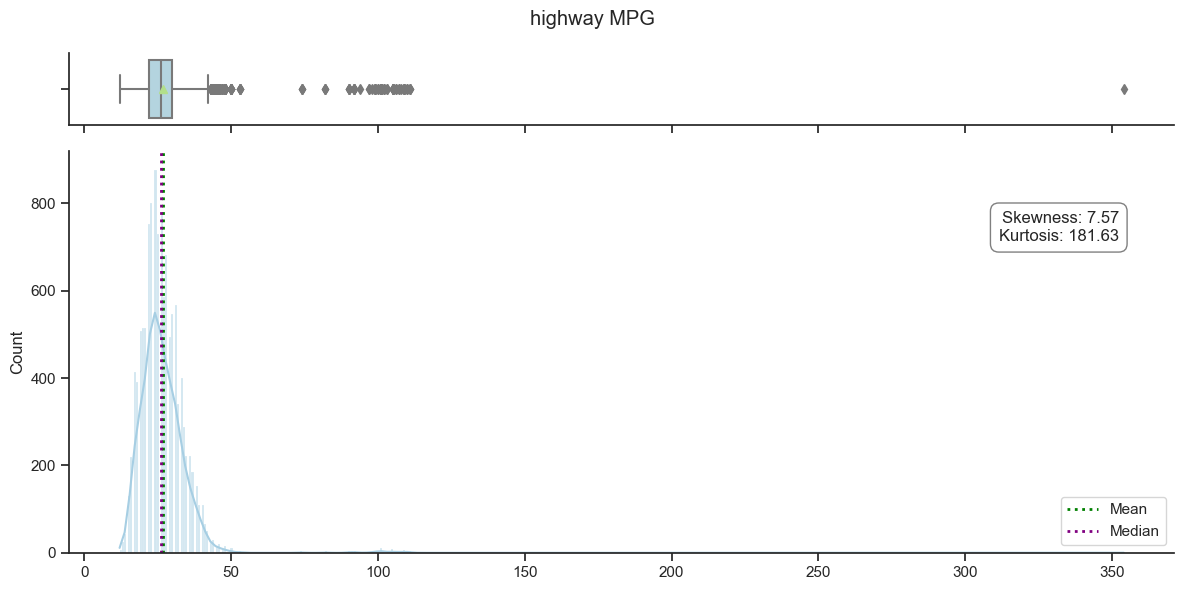

In [43]:
dist_plot(df, 'highway MPG')

🔎 **Observations:** The record with more than 350 MPG value is worth to check.

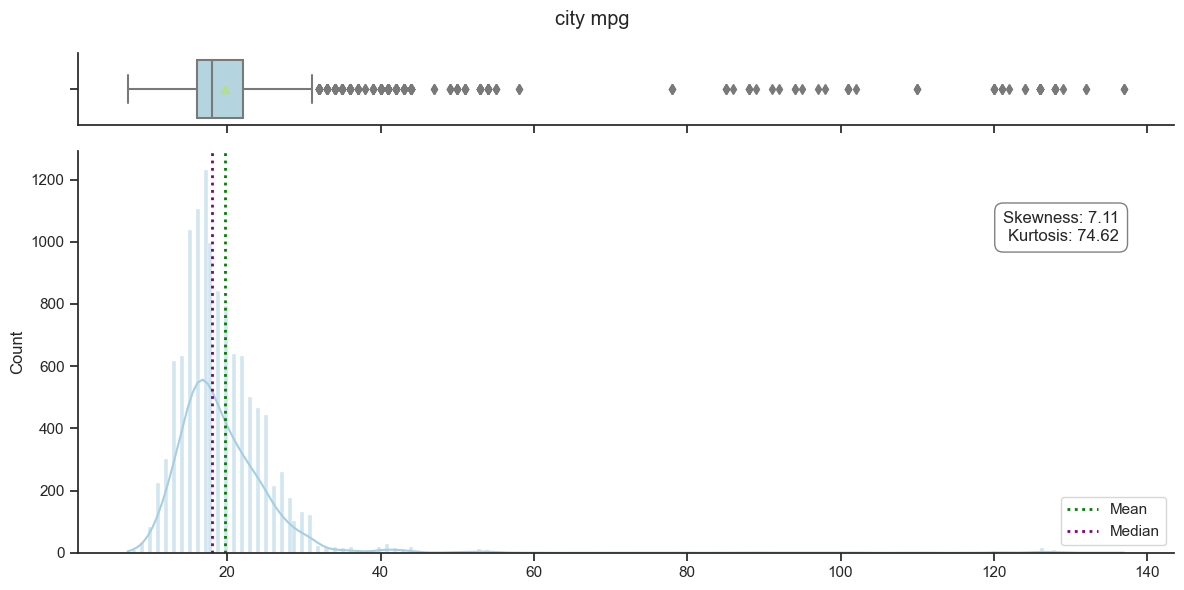

In [44]:
dist_plot(df, 'city mpg')

🔎 **Observations:** The median value of this feature is less than the median value of Higheway MPG. This looks strange as cars are tend to consume less on highways than cities due to traffic rush hours.

‼️ **It's important to check how they measure these 2 variables for electric vehicles.**

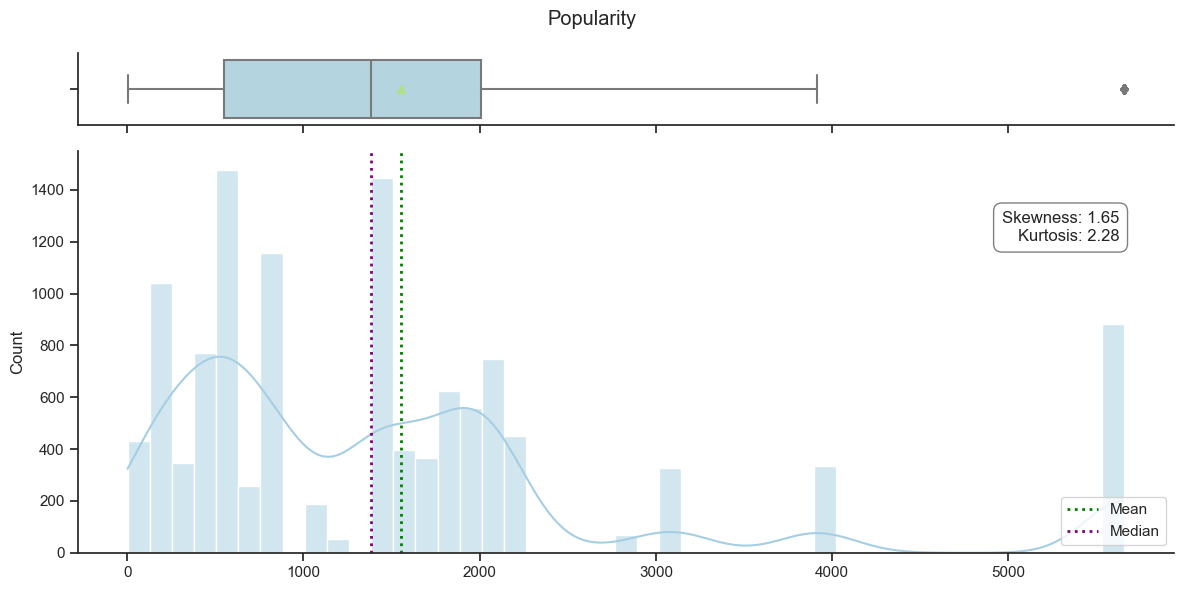

In [45]:
dist_plot(df, num_cols[6])

🔎 **Observations:** I wonder the correlation between this feature and the target.

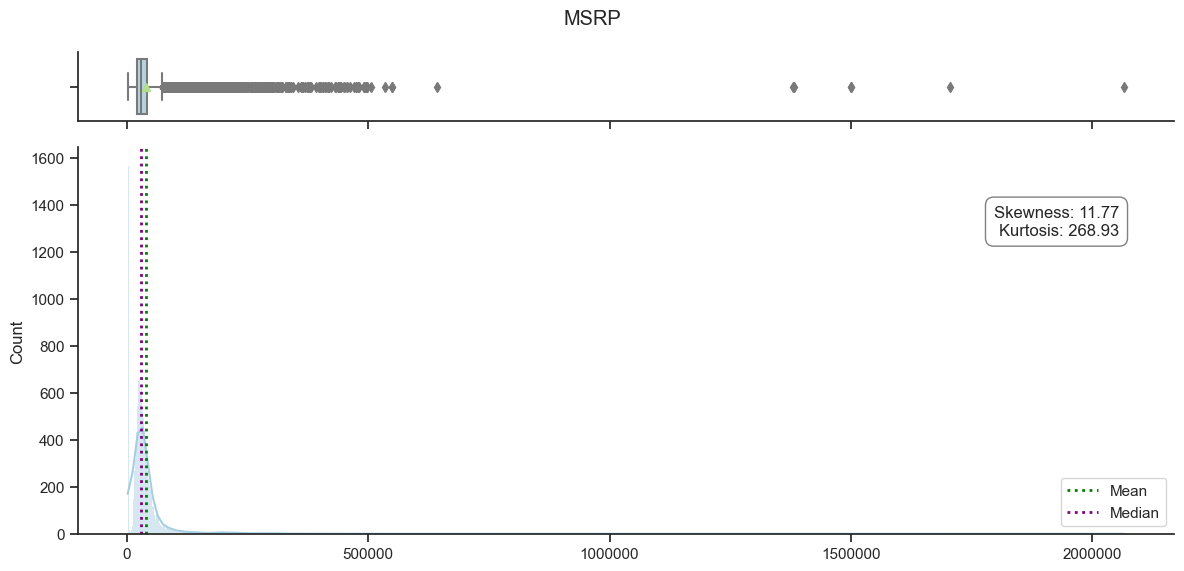

In [46]:
dist_plot(df, num_cols[7])

🔎 **Observations:** The outliers should be exemined carefully.

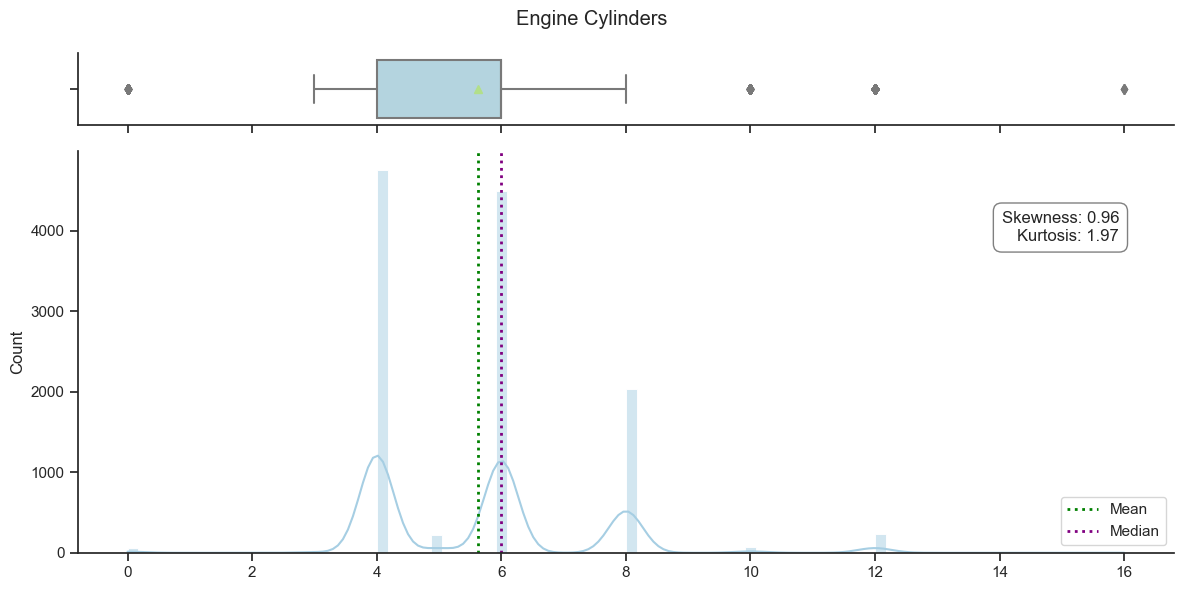

In [47]:
dist_plot(df, 'Engine Cylinders')

## Bivariate Analysis

Let's evaluate the relation of the features with the target in this section. Instead of having all plots in one figure, we'll investigate one-by-one as some features have a lot of categories and it would be hard to interpret.

In [48]:
cat_cols

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style']

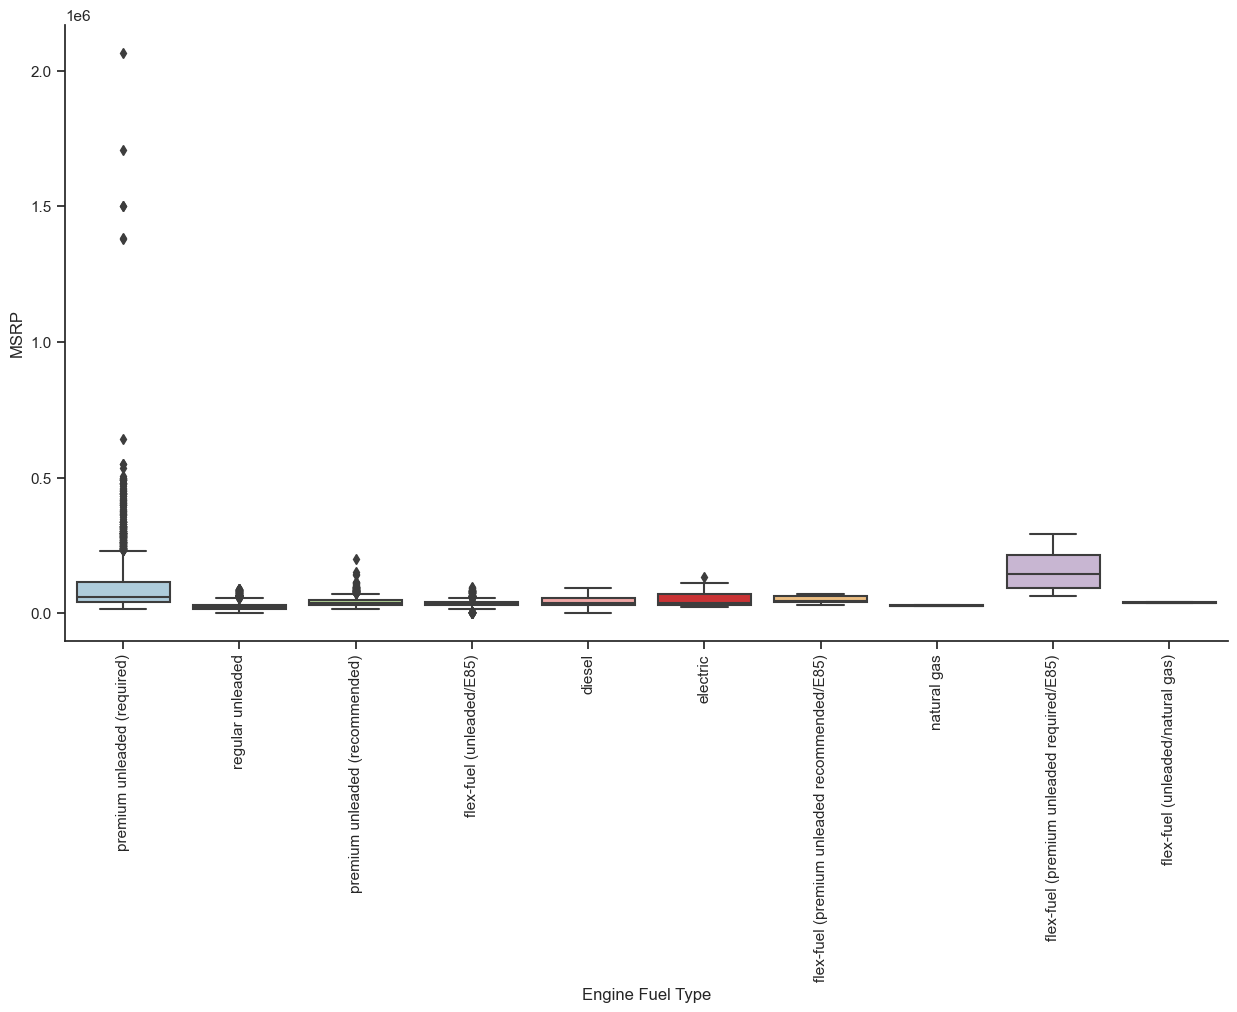

In [49]:
plt.figure(figsize=(15, 8))
sb.boxplot(data=df, x='Engine Fuel Type', y='MSRP')
plt.xticks(rotation=90)
plt.show()

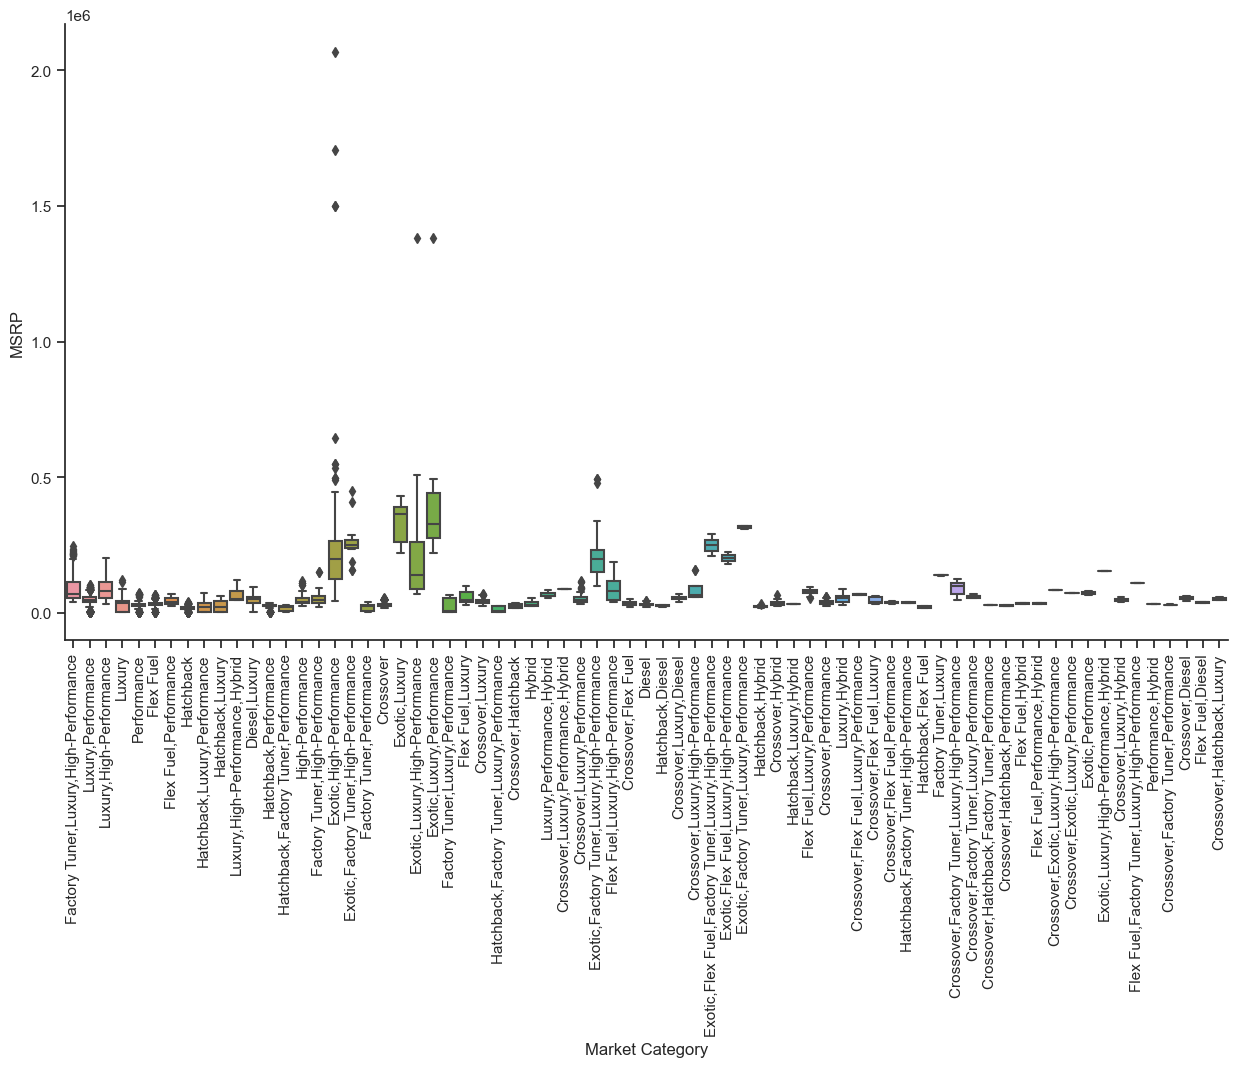

In [50]:
plt.figure(figsize=(15, 8))
sb.boxplot(data=df, x='Market Category', y='MSRP')
plt.xticks(rotation=90)
plt.show()

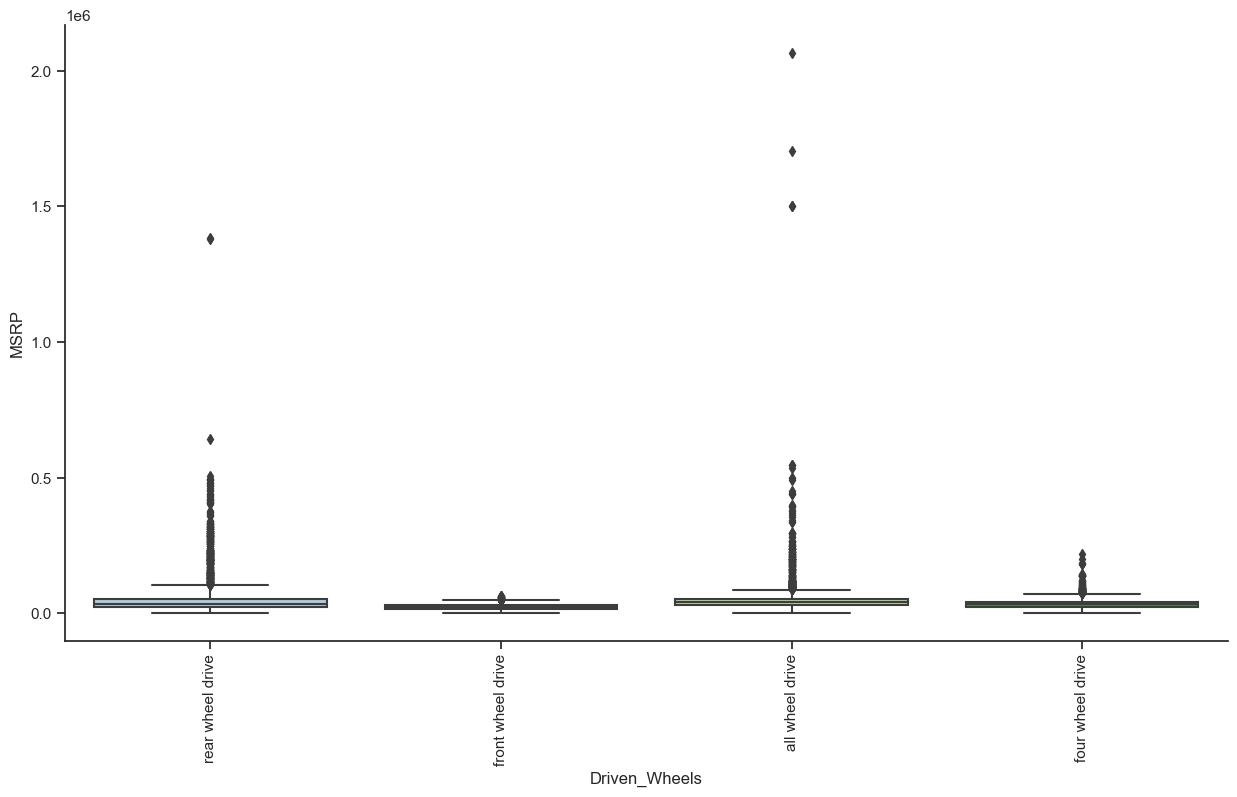

In [51]:
plt.figure(figsize=(15, 8))
sb.boxplot(data=df, x='Driven_Wheels', y='MSRP')
plt.xticks(rotation=90)
plt.show()

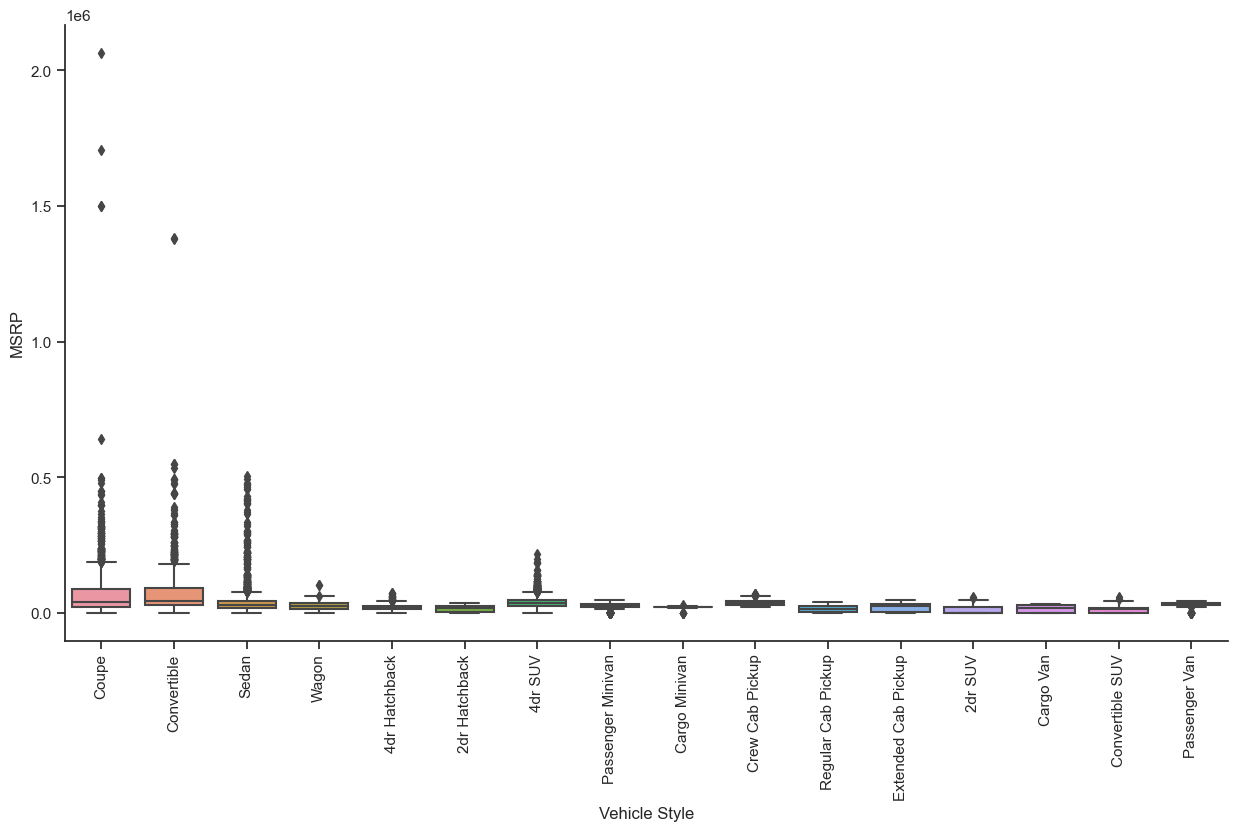

In [52]:
plt.figure(figsize=(15, 8))
sb.boxplot(data=df, x='Vehicle Style', y='MSRP')
plt.xticks(rotation=90)
plt.show()

In [53]:
num_cols

['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

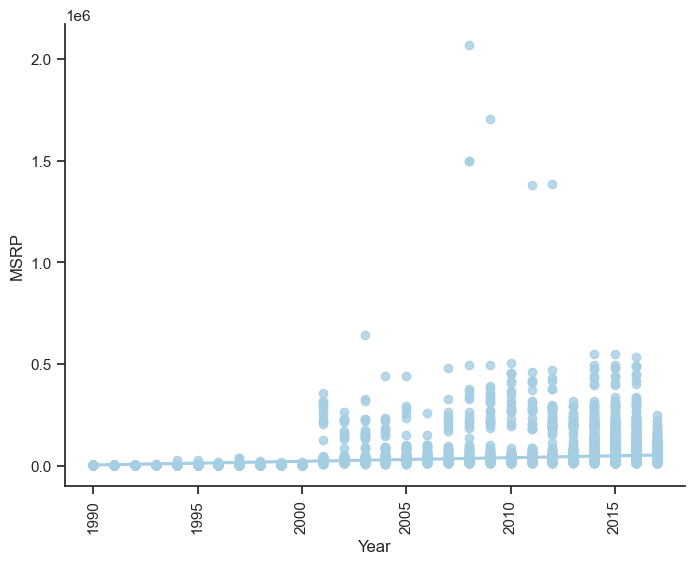

In [54]:
plt.figure(figsize=(8, 6))
sb.regplot(data=df, x='Year', y='MSRP')
plt.xticks(rotation=90)
plt.show()

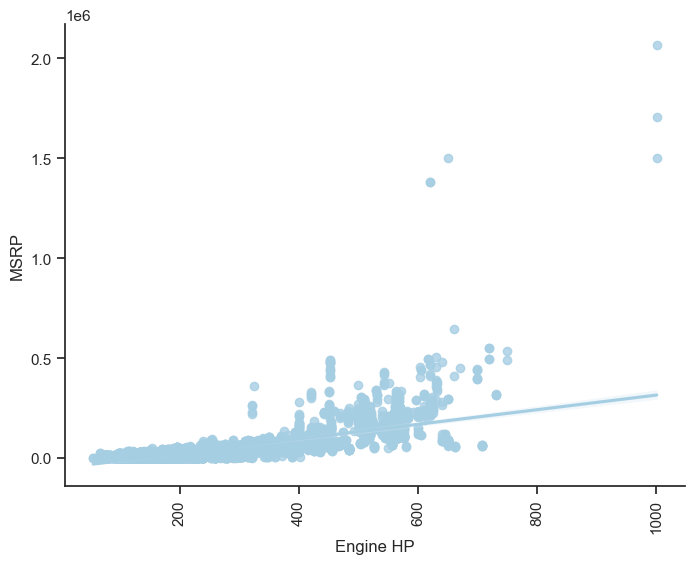

In [55]:
plt.figure(figsize=(8, 6))
sb.regplot(data=df, x='Engine HP', y='MSRP')
plt.xticks(rotation=90)
plt.show()

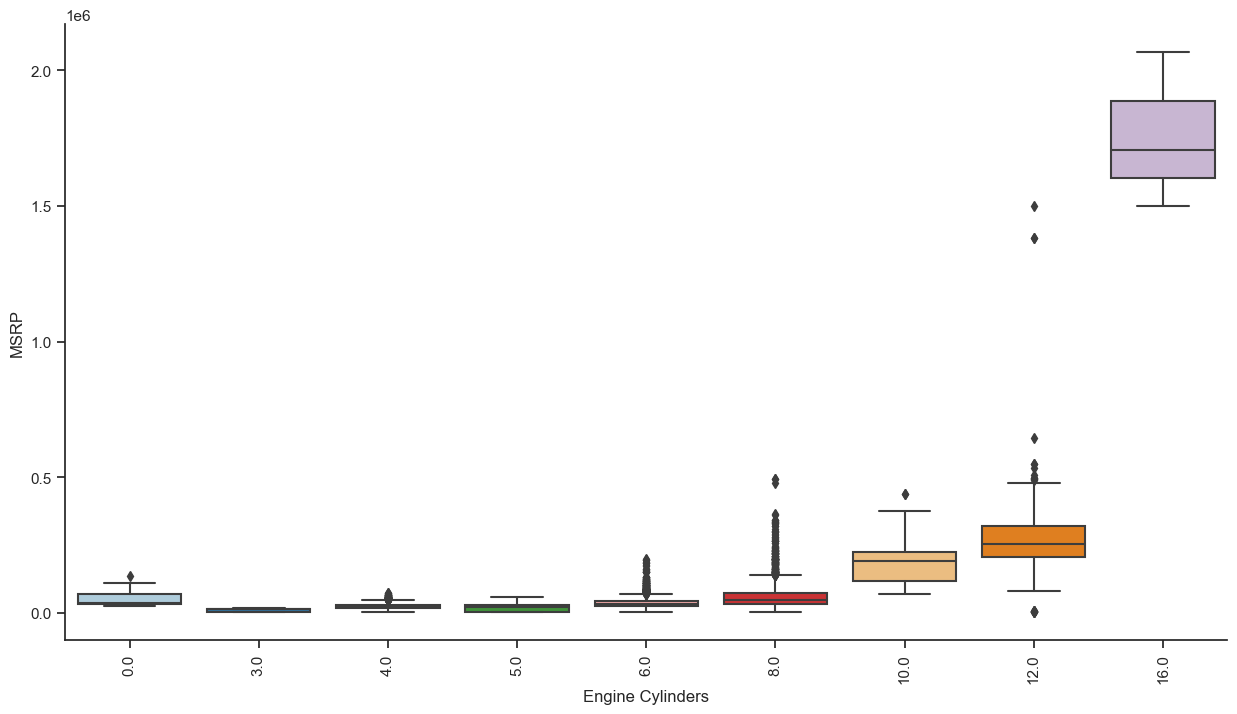

In [56]:
plt.figure(figsize=(15, 8))
sb.boxplot(data=df, x='Engine Cylinders', y='MSRP')
plt.xticks(rotation=90)
plt.show()

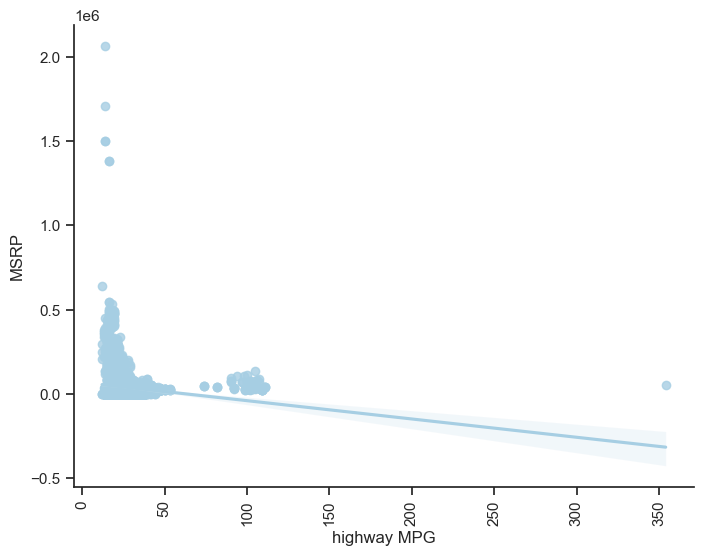

In [57]:
plt.figure(figsize=(8, 6))
sb.regplot(data=df, x='highway MPG', y='MSRP')
plt.xticks(rotation=90)
plt.show()

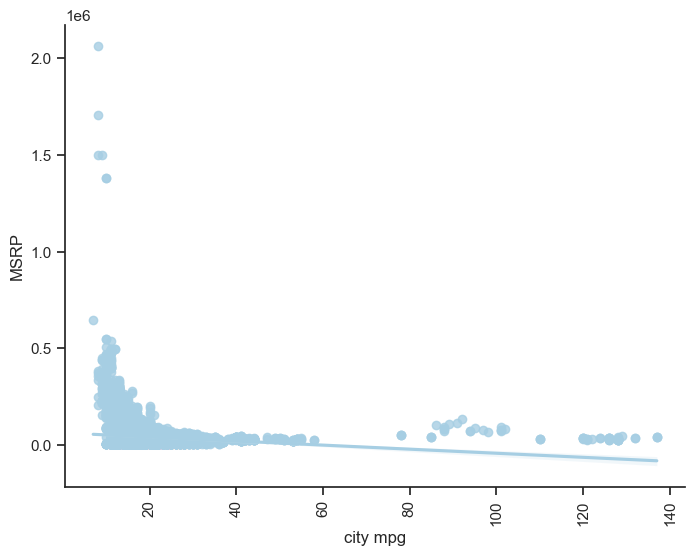

In [58]:
plt.figure(figsize=(8, 6))
sb.regplot(data=df, x='city mpg', y='MSRP')
plt.xticks(rotation=90)
plt.show()

🔎 **Observations:** Fuel consumption feature has reverse correlation with the target variable as expected.

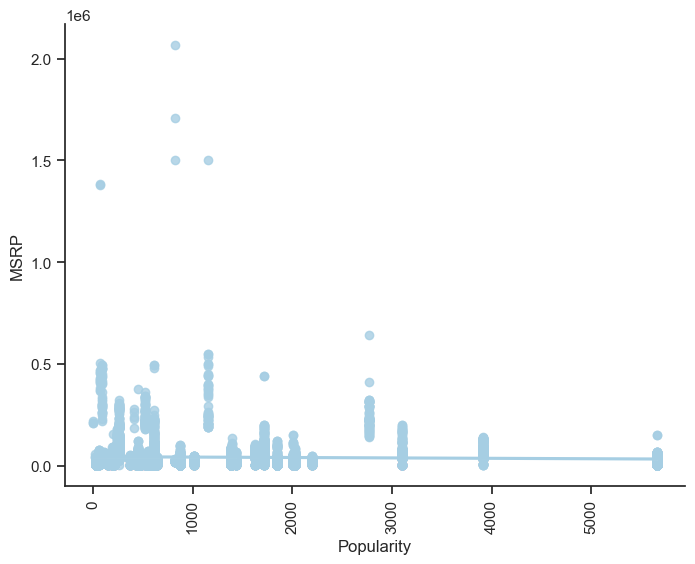

In [59]:
plt.figure(figsize=(8, 6))
sb.regplot(data=df, x='Popularity', y='MSRP')
plt.xticks(rotation=90)
plt.show()

# Data Preparation

- Drop duplicates
- Drop the Make column as Model feature covers it
- Limit the Models with at least 20 records
- Fix inconsisting Engine Fuel Type and Market Category records.
- Remove the outliers of MSRP 
- Impute the missing values with industry knowledge
- Are there any 10-cylinder vehicles?

In [60]:
df.duplicated().sum()

715

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df.shape

(11199, 16)

In [63]:
df['Make'].value_counts()

Chevrolet        1083
Ford              825
Toyota            719
Volkswagen        568
Nissan            551
Dodge             529
GMC               482
Honda             433
Mazda             412
Cadillac          396
Suzuki            342
Mercedes-Benz     341
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               229
Mitsubishi        208
Lexus             202
Buick             190
Chrysler          187
Pontiac           181
Lincoln           160
Land Rover        139
Porsche           136
Oldsmobile        132
Saab              109
Aston Martin       91
Bentley            74
Plymouth           71
Ferrari            69
FIAT               62
Scion              60
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
Tesla              18
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Genesis   

In [64]:
df['Make'].value_counts().loc[lambda x : x>=250]

Chevrolet        1083
Ford              825
Toyota            719
Volkswagen        568
Nissan            551
Dodge             529
GMC               482
Honda             433
Mazda             412
Cadillac          396
Suzuki            342
Mercedes-Benz     341
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Name: Make, dtype: int64

In [65]:
n = len(df['Make'].value_counts().loc[lambda x : x>=250])
n

17

In [66]:
top_makes = df['Make'].value_counts().nlargest(n).index.values
top_makes

array(['Chevrolet', 'Ford', 'Toyota', 'Volkswagen', 'Nissan', 'Dodge',
       'GMC', 'Honda', 'Mazda', 'Cadillac', 'Suzuki', 'Mercedes-Benz',
       'Infiniti', 'BMW', 'Audi', 'Volvo', 'Hyundai'], dtype=object)

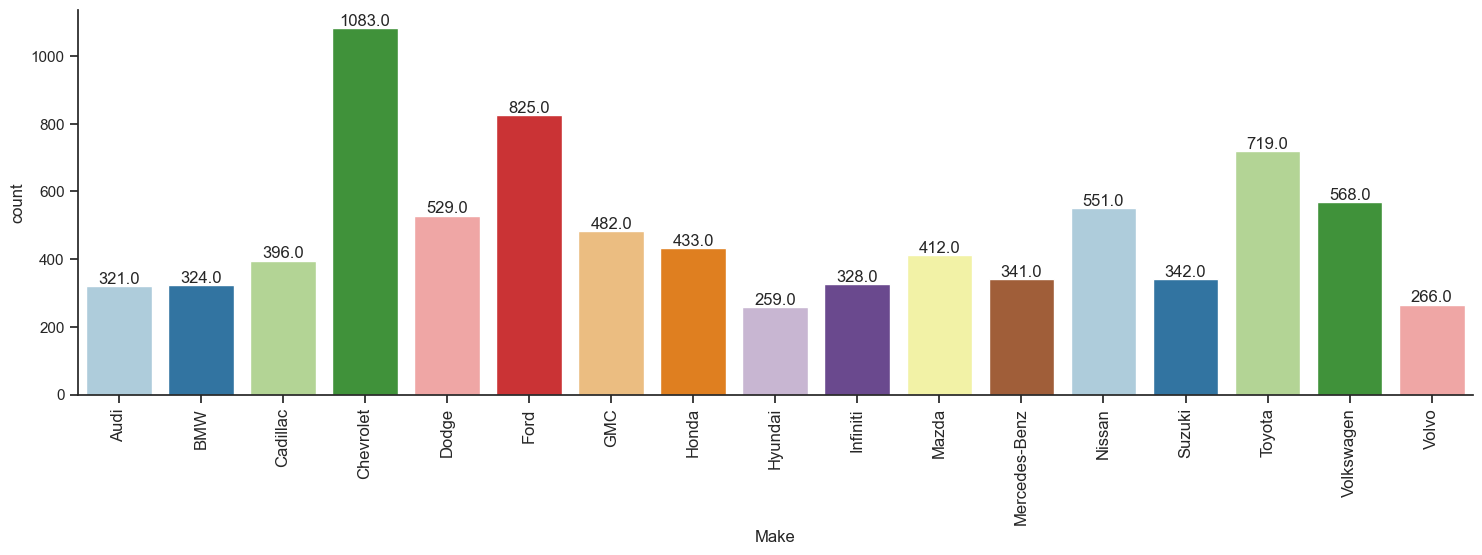

In [67]:
plot_counts(df, 'Make', n=n)

In [68]:
df[df['Make'].isin(list(top_makes))]['Model'].value_counts()

Silverado 1500    156
Tundra            129
F-150             126
Sierra 1500        90
Frontier           76
                 ... 
XC                  1
Syclone             1
ML55 AMG            1
Omni                1
1 Series M          1
Name: Model, Length: 571, dtype: int64

🔎 **Observations:** Previously the number of unique elements in Model column was 915. By using the top make filter, it reduced to 571. 

In [69]:
df[df['Make'].isin(list(top_makes))].shape

(8179, 16)

In [70]:
df[df['Make'].isin(list(top_makes))]['Model'].value_counts().loc[lambda x : x>=20]

Silverado 1500    156
Tundra            129
F-150             126
Sierra 1500        90
Frontier           76
                 ... 
CX-7               20
Cavalier           20
Q5                 20
Elantra            20
Rogue              20
Name: Model, Length: 133, dtype: int64

🔎 **Observations:** Maybe we should just focus on the Model as each Make has specific Model name and it doesn't overlap with any other Make. The threshold value of 20 is chosen arbitrarily.

In [71]:
df['Model'].value_counts().loc[lambda x : x>=20]

Silverado 1500    156
Tundra            129
F-150             126
Sierra 1500        90
Frontier           76
                 ... 
Neon               20
Navigator          20
Focus              20
LaCrosse           20
MKC                20
Name: Model, Length: 171, dtype: int64

In [72]:
nr_top_models = len(df['Model'].value_counts().loc[lambda x : x>=20])
nr_top_models

171

In [73]:
top_models = df['Model'].value_counts().nlargest(nr_top_models).index.values
top_models

array(['Silverado 1500', 'Tundra', 'F-150', 'Sierra 1500', 'Frontier',
       'Accord', 'Tacoma', 'Civic', 'Ram Pickup 1500', 'Corvette', '911',
       'C/K 1500 Series', 'Colorado', '3', 'Dakota', 'Beetle Convertible',
       'XC60', '370Z', 'Sienna', 'Golf GTI', 'Silverado 1500 Classic',
       'Sierra 1500 Classic', 'Canyon', 'Transit Wagon', 'F-250', 'A3',
       'Beetle', 'Jetta', 'Pilot', 'CTS', 'B-Series Pickup', 'Sonic',
       'GTI', 'ATS', 'Sorento', 'Truck', 'Ranger', 'E-Class', 'C-Class',
       'XL7', 'Q50', 'Expedition', 'ATS Coupe', 'Titan', 'S-10',
       'Range Rover', 'Impreza', 'Forenza', 'MDX', 'Corolla', '350Z',
       'SX4', 'Challenger', 'Camaro', '9-3', 'Acadia', '3 Series', 'CR-V',
       'Camry Solara', 'V8 Vantage', 'Aerio', 'Tribute', 'Jimmy', 'Juke',
       'Jetta SportWagen', '300', 'Esteem', 'Escalade ESV', 'Kizashi',
       'TrailBlazer', 'Escalade', 'Passat', 'Journey', '300-Class',
       'XL-7', '200', 'Terrain', 'Charger', 'Pathfinder', 'Encore',
   

In [74]:
df_top_models = df[df['Model'].isin(list(top_models))]
df_top_models.shape

(5645, 16)

In [75]:
df_top_models['Make'].value_counts().shape

(33,)

🔎 **Observations:** With this method, we limited the number of record but we increse the number of different Makes and Model which we believe that it will increase the generalization ability of the algorithms. From this point on we'll be using `df_top_models` dataframe to build our model.

2 columns has missing values
--------------------------------------------------
                 Count  Percentage %
Engine HP            7         0.124
Market Category   1892        33.516


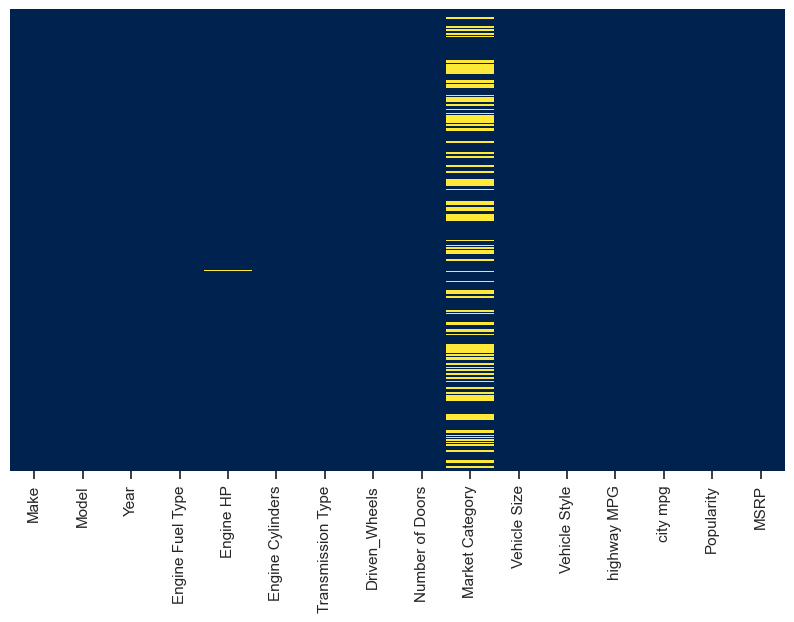

In [76]:
check_missing_values(df_top_models)

In [77]:
df_top_models[df_top_models['Engine HP'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4785,Ford,Focus,2015,electric,NaN,0.000,DIRECT_DRIVE,front wheel drive,4.000,Hatchback,Compact,4dr Hatchback,99,110,5657,29170
4789,Ford,Focus,2016,electric,NaN,0.000,DIRECT_DRIVE,front wheel drive,4.000,Hatchback,Compact,4dr Hatchback,99,110,5657,29170
4798,Ford,Focus,2017,electric,NaN,0.000,DIRECT_DRIVE,front wheel drive,4.000,Hatchback,Compact,4dr Hatchback,99,110,5657,29120
6908,Lincoln,MKZ,2017,regular unleaded,NaN,4.000,AUTOMATIC,front wheel drive,4.000,"Luxury,Hybrid",Midsize,Sedan,38,41,61,35010
6910,Lincoln,MKZ,2017,regular unleaded,NaN,4.000,AUTOMATIC,front wheel drive,4.000,"Luxury,Hybrid",Midsize,Sedan,38,41,61,39510
6916,Lincoln,MKZ,2017,regular unleaded,NaN,4.000,AUTOMATIC,front wheel drive,4.000,"Luxury,Hybrid",Midsize,Sedan,38,41,61,36760
6918,Lincoln,MKZ,2017,regular unleaded,NaN,4.000,AUTOMATIC,front wheel drive,4.000,"Luxury,Hybrid",Midsize,Sedan,38,41,61,47670


✍🏼 **Note:** We checked on the internet and we know that 2015, 2016 and 2017 Ford Focus electric vehicles have 143 HP.

In [78]:
df_top_models[(df_top_models['Make'] == 'Ford') & (df_top_models['Model'] == 'Focus') 
              & (df_top_models['Year'] == 2015) 
              & (df_top_models['Engine Fuel Type'] == 'electric')]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4785,Ford,Focus,2015,electric,NaN,0.000,DIRECT_DRIVE,front wheel drive,4.000,Hatchback,Compact,4dr Hatchback,99,110,5657,29170


In [79]:
# Updating the Engine HP for all electric Ford Focus vehicles
df_top_models.loc[(df_top_models['Make'] == 'Ford') & (df_top_models['Model'] == 'Focus') 
              & (df_top_models['Year'].isin([2015, 2016, 2017])) 
              & (df_top_models['Engine Fuel Type'] == 'electric'), 'Engine HP'] = 143
df_top_models[df_top_models['Engine HP'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6908,Lincoln,MKZ,2017,regular unleaded,NaN,4.000,AUTOMATIC,front wheel drive,4.000,"Luxury,Hybrid",Midsize,Sedan,38,41,61,35010
6910,Lincoln,MKZ,2017,regular unleaded,NaN,4.000,AUTOMATIC,front wheel drive,4.000,"Luxury,Hybrid",Midsize,Sedan,38,41,61,39510
6916,Lincoln,MKZ,2017,regular unleaded,NaN,4.000,AUTOMATIC,front wheel drive,4.000,"Luxury,Hybrid",Midsize,Sedan,38,41,61,36760
6918,Lincoln,MKZ,2017,regular unleaded,NaN,4.000,AUTOMATIC,front wheel drive,4.000,"Luxury,Hybrid",Midsize,Sedan,38,41,61,47670


In [80]:
df_top_models[(df_top_models['Make'] == 'Lincoln') & (df_top_models['Model'] == 'MKZ') 
              & (df_top_models['Year'] == 2017)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6908,Lincoln,MKZ,2017,regular unleaded,NaN,4.000,AUTOMATIC,front wheel drive,4.000,"Luxury,Hybrid",Midsize,Sedan,38,41,61,35010
6909,Lincoln,MKZ,2017,premium unleaded (recommended),245.000,4.000,AUTOMATIC,all wheel drive,4.000,Luxury,Midsize,Sedan,28,20,61,36900
6910,Lincoln,MKZ,2017,regular unleaded,NaN,4.000,AUTOMATIC,front wheel drive,4.000,"Luxury,Hybrid",Midsize,Sedan,38,41,61,39510
6911,Lincoln,MKZ,2017,premium unleaded (recommended),245.000,4.000,AUTOMATIC,front wheel drive,4.000,Luxury,Midsize,Sedan,31,21,61,39510
6912,Lincoln,MKZ,2017,premium unleaded (recommended),245.000,4.000,AUTOMATIC,all wheel drive,4.000,Luxury,Midsize,Sedan,28,20,61,49560
6913,Lincoln,MKZ,2017,premium unleaded (recommended),245.000,4.000,AUTOMATIC,front wheel drive,4.000,Luxury,Midsize,Sedan,31,21,61,35010
6914,Lincoln,MKZ,2017,premium unleaded (recommended),245.000,4.000,AUTOMATIC,all wheel drive,4.000,Luxury,Midsize,Sedan,28,20,61,41400
6915,Lincoln,MKZ,2017,premium unleaded (recommended),245.000,4.000,AUTOMATIC,front wheel drive,4.000,Luxury,Midsize,Sedan,31,21,61,47670
6916,Lincoln,MKZ,2017,regular unleaded,NaN,4.000,AUTOMATIC,front wheel drive,4.000,"Luxury,Hybrid",Midsize,Sedan,38,41,61,36760
6917,Lincoln,MKZ,2017,premium unleaded (recommended),245.000,4.000,AUTOMATIC,front wheel drive,4.000,Luxury,Midsize,Sedan,31,21,61,36760


✍🏼 **Note:** Since all of the enteries for this vehicle indicates that it has 245 HP, we'll impute the missing values as suggested.

In [81]:
# Updating the Engine HP for all Lincoln MKZ vehicles
df_top_models.loc[(df_top_models['Make'] == 'Lincoln') & (df_top_models['Model'] == 'MKZ') 
              & (df_top_models['Year'] == 2017), 'Engine HP'] = 245
df_top_models[df_top_models['Engine HP'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [82]:
df_top_models[df_top_models['Market Category'].isna()].shape

(1892, 16)

In [83]:
df_top_models[df_top_models['Engine Cylinders'] == 10]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5216,Lamborghini,Gallardo,2012,premium unleaded (required),570.000,10.000,MANUAL,all wheel drive,2.000,"Exotic,Factory Tuner,High-Performance",Compact,Convertible,20,12,1158,248000
5217,Lamborghini,Gallardo,2012,premium unleaded (required),560.000,10.000,MANUAL,all wheel drive,2.000,"Exotic,High-Performance",Compact,Convertible,20,12,1158,225400
5218,Lamborghini,Gallardo,2012,premium unleaded (required),550.000,10.000,MANUAL,rear wheel drive,2.000,"Exotic,High-Performance",Compact,Coupe,20,12,1158,187900
5219,Lamborghini,Gallardo,2012,premium unleaded (required),570.000,10.000,MANUAL,all wheel drive,2.000,"Exotic,Factory Tuner,High-Performance",Compact,Coupe,20,12,1158,237600
5220,Lamborghini,Gallardo,2012,premium unleaded (required),550.000,10.000,AUTOMATED_MANUAL,rear wheel drive,2.000,"Exotic,High-Performance",Compact,Coupe,20,13,1158,191900
5221,Lamborghini,Gallardo,2012,premium unleaded (required),560.000,10.000,MANUAL,all wheel drive,2.000,"Exotic,High-Performance",Compact,Coupe,20,12,1158,202000
5222,Lamborghini,Gallardo,2013,premium unleaded (required),560.000,10.000,AUTOMATED_MANUAL,all wheel drive,2.000,"Exotic,High-Performance",Compact,Coupe,20,13,1158,202000
5223,Lamborghini,Gallardo,2013,premium unleaded (required),560.000,10.000,AUTOMATED_MANUAL,all wheel drive,2.000,"Exotic,High-Performance",Compact,Convertible,20,13,1158,225400
5224,Lamborghini,Gallardo,2013,premium unleaded (required),570.000,10.000,AUTOMATED_MANUAL,all wheel drive,2.000,"Exotic,Factory Tuner,High-Performance",Compact,Convertible,20,13,1158,248000
5225,Lamborghini,Gallardo,2013,premium unleaded (required),550.000,10.000,MANUAL,rear wheel drive,2.000,"Exotic,High-Performance",Compact,Coupe,20,12,1158,191900


In [84]:
df_top_models[(df_top_models['Make'] == 'Lamborghini') & (df_top_models['Model'] == 'Gallardo')]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5216,Lamborghini,Gallardo,2012,premium unleaded (required),570.000,10.000,MANUAL,all wheel drive,2.000,"Exotic,Factory Tuner,High-Performance",Compact,Convertible,20,12,1158,248000
5217,Lamborghini,Gallardo,2012,premium unleaded (required),560.000,10.000,MANUAL,all wheel drive,2.000,"Exotic,High-Performance",Compact,Convertible,20,12,1158,225400
5218,Lamborghini,Gallardo,2012,premium unleaded (required),550.000,10.000,MANUAL,rear wheel drive,2.000,"Exotic,High-Performance",Compact,Coupe,20,12,1158,187900
5219,Lamborghini,Gallardo,2012,premium unleaded (required),570.000,10.000,MANUAL,all wheel drive,2.000,"Exotic,Factory Tuner,High-Performance",Compact,Coupe,20,12,1158,237600
5220,Lamborghini,Gallardo,2012,premium unleaded (required),550.000,10.000,AUTOMATED_MANUAL,rear wheel drive,2.000,"Exotic,High-Performance",Compact,Coupe,20,13,1158,191900
5221,Lamborghini,Gallardo,2012,premium unleaded (required),560.000,10.000,MANUAL,all wheel drive,2.000,"Exotic,High-Performance",Compact,Coupe,20,12,1158,202000
5222,Lamborghini,Gallardo,2013,premium unleaded (required),560.000,10.000,AUTOMATED_MANUAL,all wheel drive,2.000,"Exotic,High-Performance",Compact,Coupe,20,13,1158,202000
5223,Lamborghini,Gallardo,2013,premium unleaded (required),560.000,10.000,AUTOMATED_MANUAL,all wheel drive,2.000,"Exotic,High-Performance",Compact,Convertible,20,13,1158,225400
5224,Lamborghini,Gallardo,2013,premium unleaded (required),570.000,10.000,AUTOMATED_MANUAL,all wheel drive,2.000,"Exotic,Factory Tuner,High-Performance",Compact,Convertible,20,13,1158,248000
5225,Lamborghini,Gallardo,2013,premium unleaded (required),550.000,10.000,MANUAL,rear wheel drive,2.000,"Exotic,High-Performance",Compact,Coupe,20,12,1158,191900


In [85]:
df_top_models[(df_top_models['Make'] == 'Audi') & (df_top_models['Model'] == 'R8')]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
7968,Audi,R8,2014,premium unleaded (required),525.000,10.000,MANUAL,all wheel drive,2.000,"Luxury,High-Performance",Compact,Convertible,19,12,3105,164700
7969,Audi,R8,2014,premium unleaded (required),430.000,8.000,MANUAL,all wheel drive,2.000,"Luxury,High-Performance",Compact,Convertible,20,11,3105,128400
7970,Audi,R8,2014,premium unleaded (required),550.000,10.000,AUTOMATED_MANUAL,all wheel drive,2.000,"Luxury,High-Performance",Compact,Coupe,22,13,3105,179645
7971,Audi,R8,2014,premium unleaded (required),525.000,10.000,AUTOMATED_MANUAL,all wheel drive,2.000,"Luxury,High-Performance",Compact,Convertible,22,13,3105,173800
7972,Audi,R8,2014,premium unleaded (required),430.000,8.000,AUTOMATED_MANUAL,all wheel drive,2.000,"Luxury,High-Performance",Compact,Convertible,23,14,3105,137500
7973,Audi,R8,2014,premium unleaded (required),525.000,10.000,MANUAL,all wheel drive,2.000,"Luxury,High-Performance",Compact,Coupe,19,12,3105,151200
7974,Audi,R8,2014,premium unleaded (required),430.000,8.000,AUTOMATED_MANUAL,all wheel drive,2.000,"Luxury,High-Performance",Compact,Coupe,23,14,3105,124000
7975,Audi,R8,2014,premium unleaded (required),430.000,8.000,MANUAL,all wheel drive,2.000,"Luxury,High-Performance",Compact,Coupe,20,11,3105,114900
7976,Audi,R8,2014,premium unleaded (required),525.000,10.000,AUTOMATED_MANUAL,all wheel drive,2.000,"Luxury,High-Performance",Compact,Coupe,22,13,3105,160300
7977,Audi,R8,2014,premium unleaded (required),550.000,10.000,MANUAL,all wheel drive,2.000,"Luxury,High-Performance",Compact,Coupe,19,12,3105,170545


✍🏼 **Note:** We'll drop the Make column as it's covered by the Model and Market Category as it has too many missing values.

In [86]:
df_top_models.drop(['Make', 'Market Category'], axis=1, inplace=True)

/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_84366/374354533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_models.drop(['Make', 'Market Category'], axis=1, inplace=True)


In [87]:
df_top_models.reset_index(drop=True, inplace=True)

In [88]:
df_top_models.to_csv('../Data/Processed/processed_data.csv', index=False)

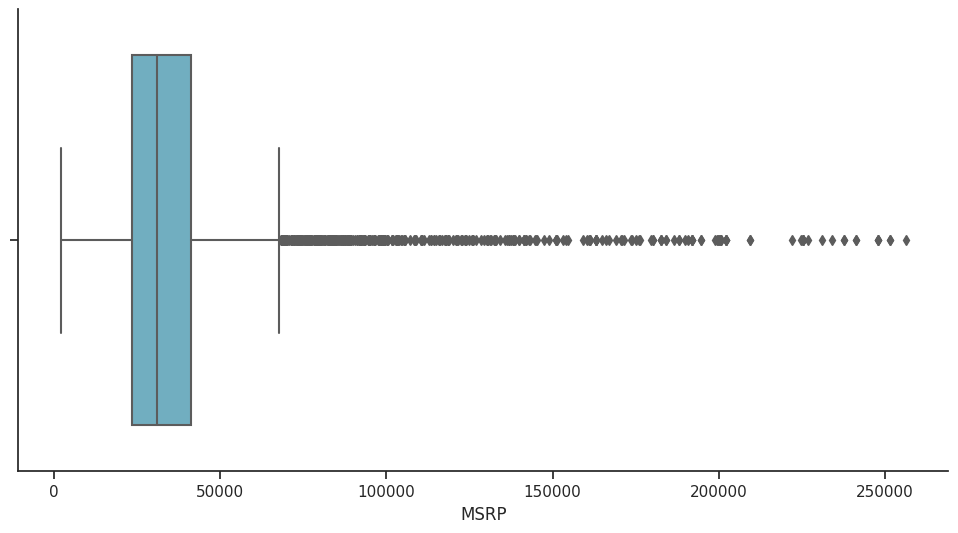

In [ ]:
plt.figure(figsize=(12,6))
sb.boxplot(data=df_top_models, x='MSRP', color='c')
plt.show()

🔎 **Observations:** After removing less frequent models from the dataset, it seems that we don't have the extreme outliers anymore. That's why we are not going to remove any of them for now.

In [89]:
cat_cols.remove('Make')
cat_cols.remove('Market Category')
cat_cols

['Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Vehicle Size',
 'Vehicle Style']

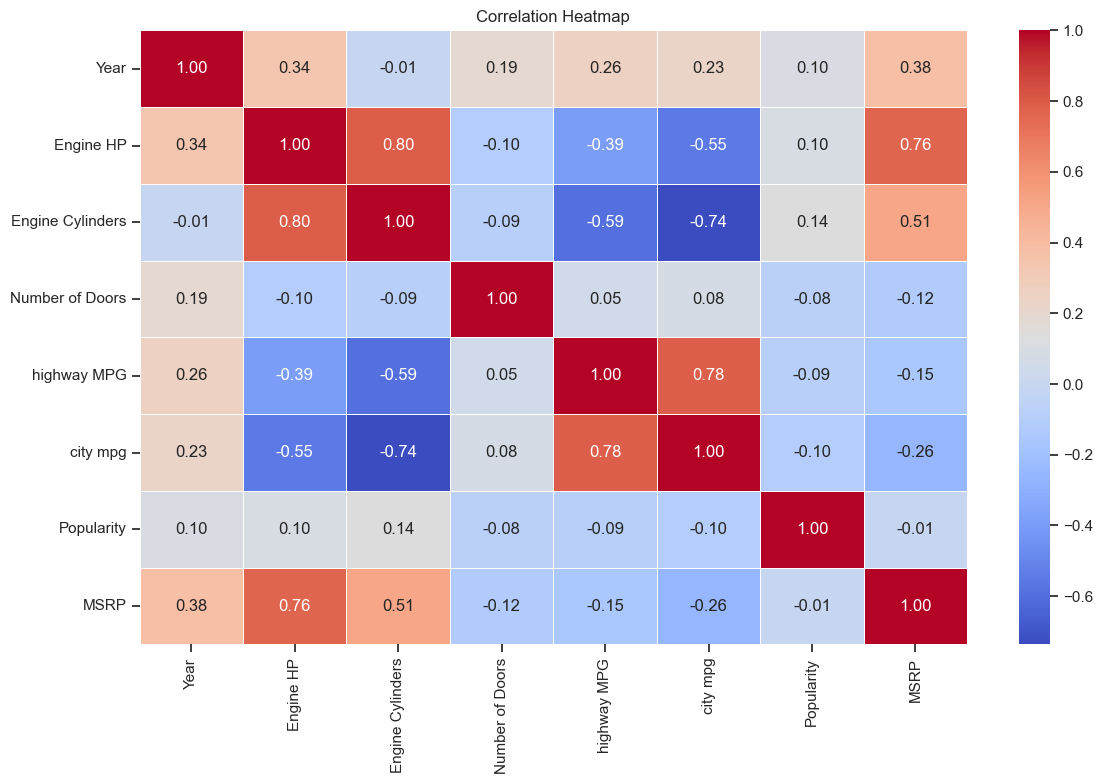

In [90]:
fig, ax = plt.subplots(figsize=(12, 8))
sb.heatmap(df_top_models[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

🔎 **Observations:**

In [91]:
df_encoded = pd.get_dummies(data=df_top_models, columns=cat_cols, drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5645 entries, 0 to 5644
Columns: 209 entries, Year to Vehicle Style_Wagon
dtypes: float64(3), int64(5), uint8(201)
memory usage: 1.4 MB


In [92]:
df_encoded.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Model_3,Model_3 Series,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,1990,162.000,5.000,4.000,20,16,3105,2000,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1990,162.000,5.000,4.000,22,15,3105,2000,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1990,162.000,5.000,4.000,23,15,3105,2000,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1991,217.000,5.000,4.000,22,16,3105,2000,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1991,217.000,5.000,4.000,22,16,3105,2000,0,0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
from sklearn.preprocessing import StandardScaler

✍🏼 **Note:** Let's split the data before we scale it not cause any data leakage.

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x = df_encoded.drop('MSRP', axis=1)
y = df_encoded['MSRP']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [96]:
std_scaler = StandardScaler()
x_std = std_scaler.fit(x_train)
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

# Model Building

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [98]:
def model_evaluation(x, y, models):
    names = []
    scoring = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

    df_results = pd.DataFrame(columns=['Algorithm', 'R2 Mean', 'R2 STD', 'RMSE Mean', 'RMSE STD'])
    results_r2 = []
    results_mae = []
    results_rmse = []
    
    for name, model in models:
        names.append(name)
        kfold = KFold(n_splits=10, shuffle=True, random_state=101)
        result = cross_validate(model, x, y, cv=kfold, scoring=scoring)
    
        # R2 Score of the model
        r2_mean = result['test_r2'].mean()
        r2_std = result['test_r2'].std()

        # MAE Score of the model
        mae_mean = abs(result['test_neg_mean_absolute_error'].mean())
        mae_std = result['test_neg_mean_absolute_error'].std()
        
        # RMSE Score of the model
        rmse_mean = abs(result['test_neg_root_mean_squared_error'].mean())
        rmse_std = result['test_neg_root_mean_squared_error'].std()
        

        df_result_row = {'Algorithm': name, 'R2 Mean': r2_mean, 'R2 STD': r2_std, 'RMSE Mean': rmse_mean, 
                         'RMSE STD': rmse_std, 'MAE Mean': mae_mean, 'MEA STD': mae_std}
        df_results = pd.concat([df_results, pd.DataFrame([df_result_row])], ignore_index=True)
        results_r2.append(result['test_r2'])
        results_mae.append(abs(result['test_neg_mean_absolute_error']))
        results_rmse.append(abs(result['test_neg_root_mean_squared_error']))

    df_results = df_results.set_index('Algorithm')
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    # Display the mean and standard deviation of all metrics for all algorithms
    print(df_results)
    
    # Display the overall results in a boxplot graph
    plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    fig, (ax1, ax2, ax3) = plot_objects
    
    ax1.boxplot(results_r2)
    ax1.set_title('R2', fontsize=14)
    ax1.set_xticklabels(names, rotation=30)
    ax2.boxplot(results_mae)
    ax2.set_title('MAE', fontsize=14)
    ax2.set_xticklabels(names, rotation=30)
    ax3.boxplot(results_rmse)
    ax3.set_title('RMSE', fontsize=14)
    ax3.set_xticklabels(names, rotation=30)
    plt.tight_layout()
    plt.show()

## Ensemble Mehtods

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
models = []
models.append(('RFR', RandomForestRegressor()))
models.append(('ADR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))

           R2 Mean  R2 STD  RMSE Mean  RMSE STD  MAE Mean  MEA STD
Algorithm                                                         
RFR          0.969   0.008   4854.164   690.428  2995.980  123.410
ADR          0.844   0.036  10886.053   529.522  8761.206  566.792
GBR          0.954   0.008   5934.661   537.922  3995.736  225.786


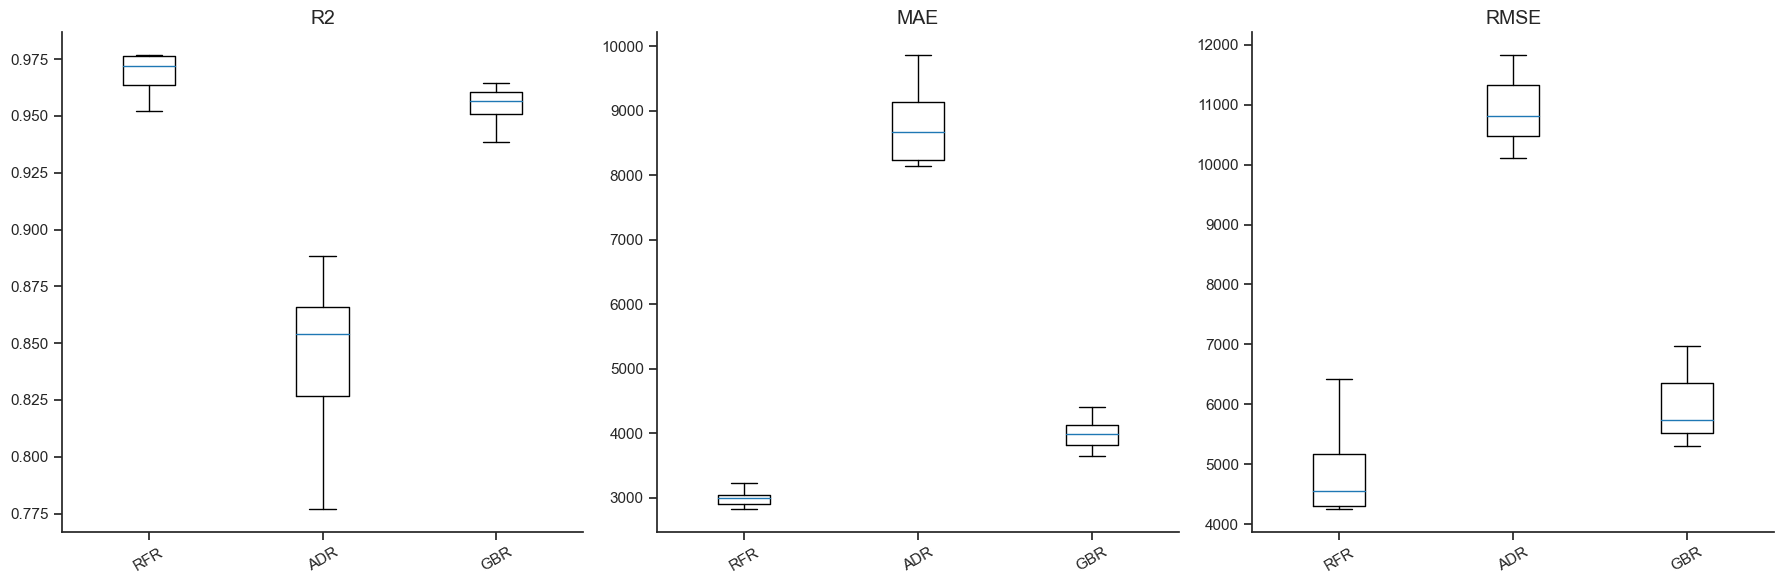

In [101]:
model_evaluation(x_train_std, y_train, models)

## Non-linear Methods

In [102]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

           R2 Mean  R2 STD  RMSE Mean  RMSE STD  MAE Mean  MEA STD
Algorithm                                                         
SVR         -0.040   0.013  28571.363  3020.149 15376.183  992.153
DTR          0.961   0.013   5376.422   638.608  3216.906   88.111
KNN          0.948   0.016   6303.668  1035.482  3629.782  244.371
GNB          0.931   0.023   7230.695  1155.870  4215.721  298.356


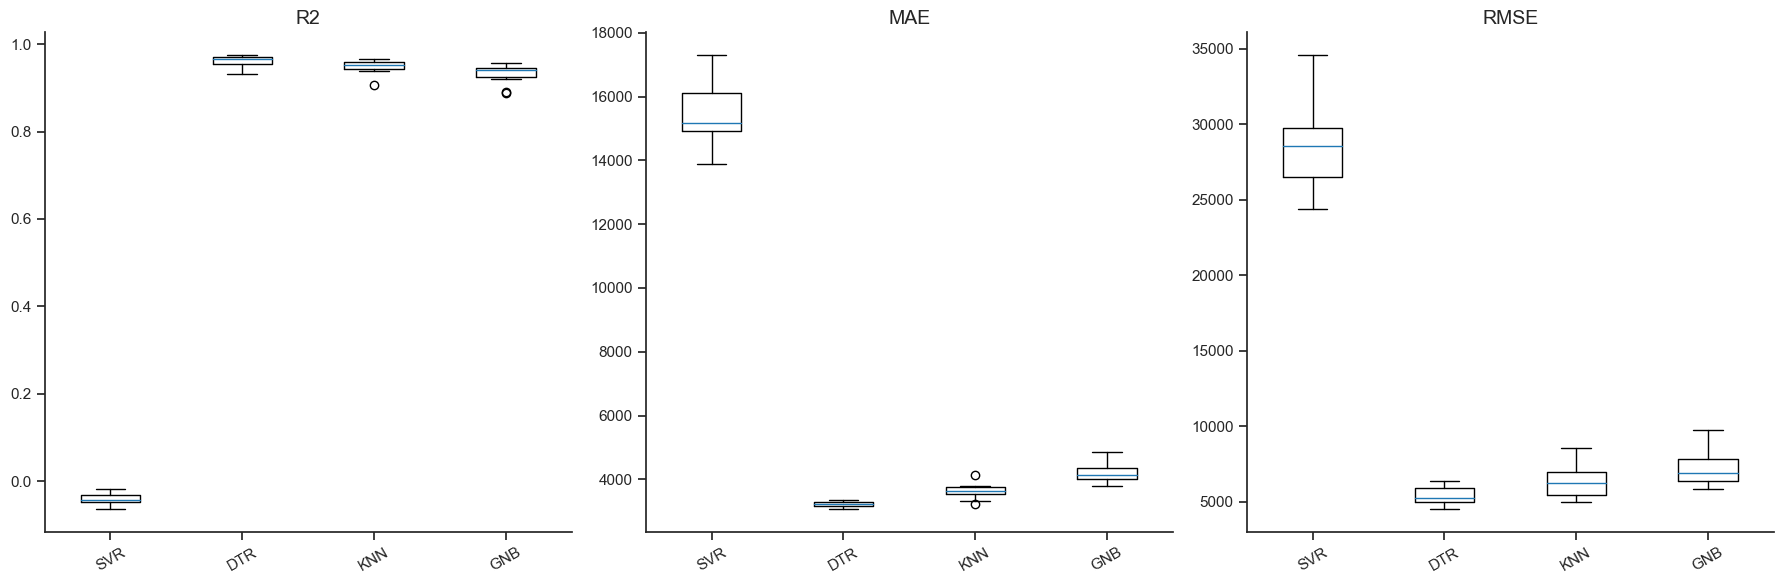

In [103]:
models = []
models.append(('SVR', SVR()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('GNB', GaussianNB()))

model_evaluation(x_train_std, y_train, models)

## Linear Mehtods

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

           R2 Mean  R2 STD  RMSE Mean  RMSE STD  MAE Mean  MEA STD
Algorithm                                                         
LNR          0.946   0.015   6446.487   930.512  3802.600  199.053
LDA         -0.444   0.663  31804.225  6953.475 25126.983 7438.801


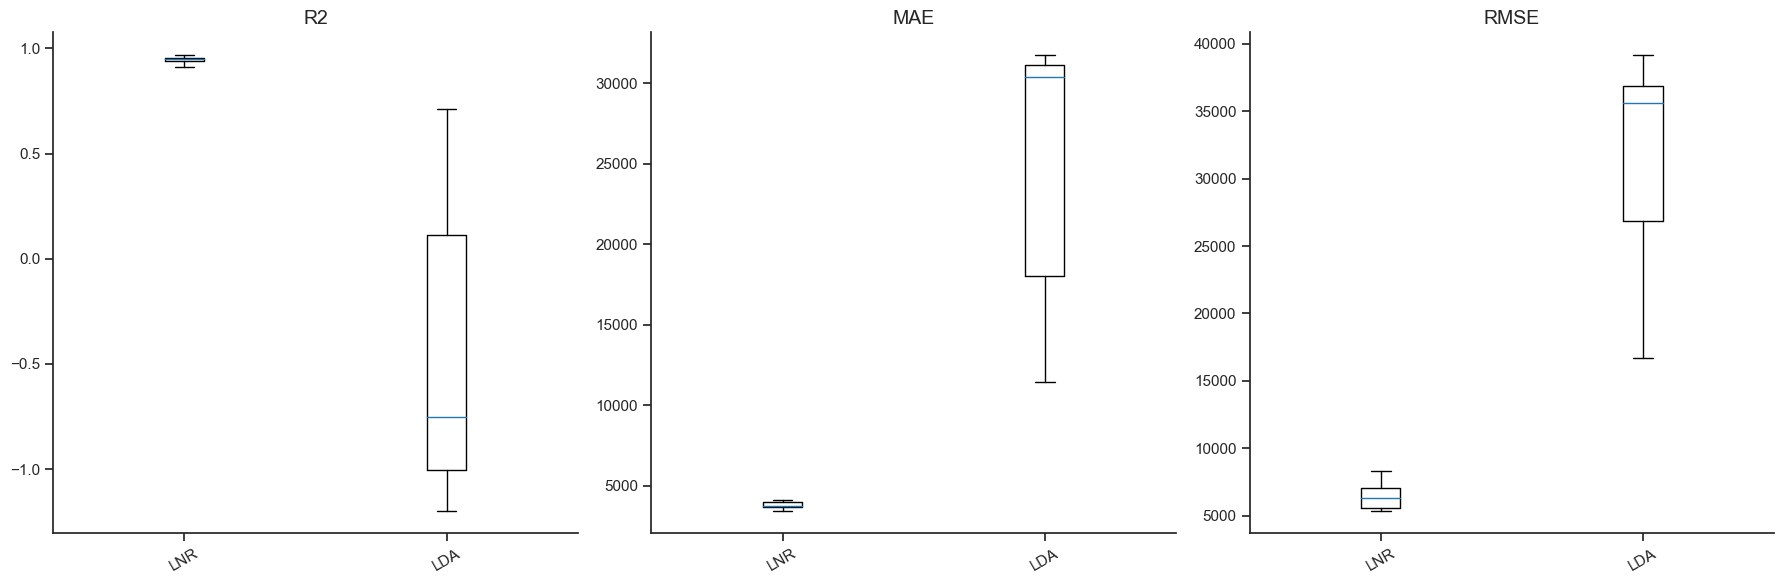

In [105]:
models = []
models.append(('LNR', LinearRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
model_evaluation(x_train_std, y_train, models)

### Check for Multicolinearity

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
vif_series = pd.Series(
    [variance_inflation_factor(df_top_models[num_cols], i) for i in range(df_top_models[num_cols].shape[1])],
    index = num_cols,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series.sort_values(ascending=False)))

VIF Scores: 

Year               133.271
Engine Cylinders    60.548
city mpg            57.882
Engine HP           40.483
highway MPG         34.400
Number of Doors     18.532
MSRP                 7.346
Popularity           2.490
dtype: float64



🔎 **Observations:** As it can be seen on correlation matrix, most of the numeric feature has correlation with each other.

In [108]:
# Importing libraries for building linear regression model
import statsmodels.api as sm

### Checking for the assumptions and rebuilding the model
In this step, we will check whether the below assumptions hold true or not for the model. In case there is an issue, we will rebuild the model after fixing those issues.

1. Mean of residuals should be 0
2. Normality of error terms
3. Linearity of variables
4. No heteroscedasticity

*Homoscedasticity: If the variance of the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.*

*Heteroscedasticity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form an arrow shape or any other non symmetrical shape.*

*We will use Goldfeld–Quandt test to check homoscedasticity.*

* **Null hypothesis:** Residuals are homoscedastic

* **Alternate hypothesis:** Residuals are hetroscedastic

To make the check easier we'll build the linear model using the OLS method of statsmodels API.

In [109]:
# Adding the intercept term
x_train_new = sm.add_constant(x_train_std)

ols_model_0 = sm.OLS(y_train, x_train_std)

# Fitting the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MSRP   R-squared (uncentered):                   0.356
Model:                            OLS   Adj. R-squared (uncentered):              0.326
Method:                 Least Squares   F-statistic:                              11.75
Date:                Thu, 08 Feb 2024   Prob (F-statistic):                   4.38e-281
Time:                        21:00:27   Log-Likelihood:                         -53908.
No. Observations:                4516   AIC:                                  1.082e+05
Df Residuals:                    4313   BIC:                                  1.095e+05
Df Model:                         203                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [110]:
# Residuals
residual = ols_res_0.resid
residual.mean()

36469.49047829947

🔎 **Observations:** The mean of residuals is way over 0. Hence, the corresponding assumption is **not satisfied**.

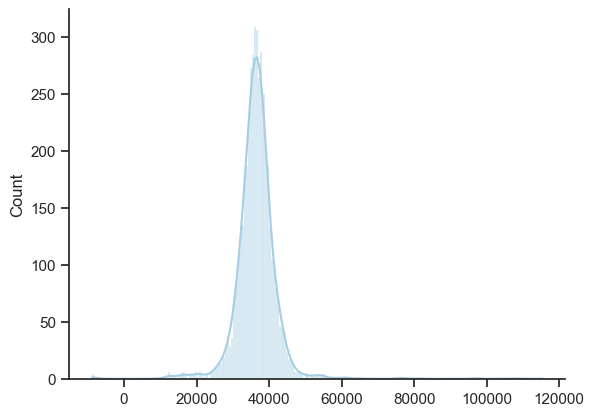

In [111]:
# Plot histogram of residuals
sb.histplot(residual, kde = True)
plt.show()

🔎 **Observations:** We can see that the error terms are normally distributed. The assumption of normality is **satisfied**.

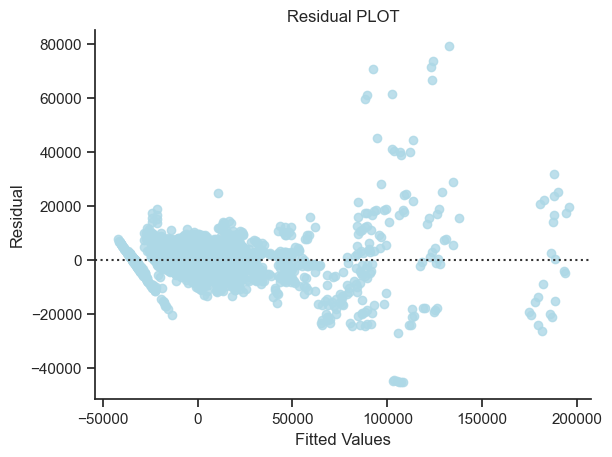

In [112]:
# Predicted values
fitted = ols_res_0.fittedvalues

sb.residplot(x = fitted, y = residual, color = "lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

🔎 **Observations:** It looks like the residuals are randomly distributed so we can consider this assumption is satisfied.

In [113]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [114]:
# Log transformation on the target variable
y_train_log = np.log(y_train)
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train_log, x_train_new)

lzip(name, test)

[('F statistic', 1.03807183440307), ('p-value', 0.19855906416789482)]

🔎 **Observation:** As we observe from the above test, the `p-value` is greater than 0.05, so we fail to reject the null-hypothesis. That means the residuals are homoscedastic.

# Finalize Model

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
RFR = RandomForestRegressor()

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=101)

h_params = {
    'max_depth': [10, 50, 100],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [400, 1000, 2000]
}

grid = GridSearchCV(
    estimator = RFR,
    param_grid = h_params,
    scoring = 'r2', 
    n_jobs = -1,
    cv = crossvalidation
)

grid.fit(x_train_std, y_train)

grid.best_params_, grid.best_score_

/opt/anaconda3/envs/cloneTF2/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
model = RandomForestRegressor(**grid.best_params_)
model.fit(x_train_std, y_train)

In [ ]:
y_hat = model.predict(x_test_std)

In [ ]:
model.score(x_test_std, y_test)

# Future Work

- Ignoring all categorical features and building the model on numeric features only as for some buyers the name and the shape of the vehicle are not important. 
- Dimensionality reduction techniques can be applied such as PCA to improve the model building time.